# Detection of Fraud Reviews: Exploratory Data Analysis and Pre-Processing

# Loading libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from wordcloud import WordCloud

# Pre=Processing
import re
import nltk
import demoji
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('vader_lexicon')

from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LeeShan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LeeShan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\LeeShan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\LeeShan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\LeeShan\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\LeeShan\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


# Reading datasets

## Fake Reviews dataset

In [2]:
# Path to your CSV file
fake_reviews_path = '/Users/LeeShan/Fake-Reviews-Detection/Dataset/fake reviews dataset.csv'


# Read the CSV file
fake_reviews_df = pd.read_csv(fake_reviews_path)

In [3]:
fake_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40432 entries, 0 to 40431
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   category  40432 non-null  object 
 1   rating    40432 non-null  float64
 2   label     40432 non-null  object 
 3   text_     40432 non-null  object 
dtypes: float64(1), object(3)
memory usage: 1.2+ MB


In [4]:
fake_reviews_df.shape

(40432, 4)

In [5]:
fake_reviews_df.columns

Index(['category', 'rating', 'label', 'text_'], dtype='object')

In [6]:
# Display the first few rows
fake_reviews_df.head()

category  rating label  \
0  Home_and_Kitchen_5     5.0    CG   
1  Home_and_Kitchen_5     5.0    CG   
2  Home_and_Kitchen_5     5.0    CG   
3  Home_and_Kitchen_5     1.0    CG   
4  Home_and_Kitchen_5     5.0    CG   

                                               text_  
0  Love this!  Well made, sturdy, and very comfor...  
1  love it, a great upgrade from the original.  I...  
2  This pillow saved my back. I love the look and...  
3  Missing information on how to use it, but it i...  
4  Very nice set. Good quality. We have had the s...

## Yelp dataset

In [7]:
# Path to your Excel file
yelp_path = '/Users/LeeShan/Fake-Reviews-Detection/Dataset/Yelp Labelled Review Dataset with Sentiments and Features.xlsx'

# Read the Excel file
yelp_df = pd.read_excel(yelp_path, engine='openpyxl')

In [8]:
yelp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355210 entries, 0 to 355209
Data columns (total 8 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   User_id                  355210 non-null  int64         
 1   Product_id               355210 non-null  int64         
 2   Rating                   355210 non-null  int64         
 3   Date                     355210 non-null  datetime64[ns]
 4   Review                   355210 non-null  object        
 5   Spam(1) and Not Spam(0)  355210 non-null  int64         
 6   Sentiment                355210 non-null  object        
 7   Features                 355210 non-null  object        
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 21.7+ MB


In [9]:
yelp_df.shape

(355210, 8)

In [10]:
yelp_df.columns

Index(['User_id', 'Product_id', 'Rating', 'Date', 'Review',
       'Spam(1) and Not Spam(0)', 'Sentiment', 'Features'],
      dtype='object')

In [11]:
# Display the first few rows
yelp_df.head()

User_id  Product_id  Rating       Date  \
0      923           0       3 2014-01-30   
1      924           0       3 2011-05-05   
2      925           0       4 2011-12-30   
3      926           0       4 2012-10-04   
4      927           0       4 2014-02-06   

                                              Review  Spam(1) and Not Spam(0)  \
0  The food at snack is a selection of popular Gr...                        1   
1  This little place in Soho is wonderful. I had ...                        1   
2  ordered lunch for 15 from Snack last Friday. Ã...                        1   
3  This is a beautiful quaint little restaurant o...                        1   
4  Snack is great place for a Ã‚Â casual sit down...                        1   

  Sentiment                                           Features  
0  Positive  ['appetizer tray', 'greek salad', 'main courses']  
1  Positive  ['little place', 'soho', 'lamb sandwich', 'soh...  
2  Positive            ['snack', 'regular company lunch list']  
3  Positive  ['beautiful quaint', 'pretty street', 'great p...  
4  Positive  ['snack', 'great place', 'Ã¢ casual', 'cold wi...

# Check for missing values

## Fake Reviews dataset

In [12]:
# Check for missing values
fake_reviews_df.isnull().sum()

category    0
rating      0
label       0
text_       0
dtype: int64

## Yelp dataset

In [13]:
# Check for missing values
yelp_df.isnull().sum()

User_id                    0
Product_id                 0
Rating                     0
Date                       0
Review                     0
Spam(1) and Not Spam(0)    0
Sentiment                  0
Features                   0
dtype: int64

# Check for duplicated values

## Fake Reviews dataset

In [14]:
fake_reviews_df_duplicates = fake_reviews_df.duplicated().sum()

print("Number of duplicates in dataset:", fake_reviews_df_duplicates)

Number of duplicates in dataset: 12


In [15]:
# If you want to see the actual duplicate rows
fake_reviews_duplicate_rows = fake_reviews_df[fake_reviews_df.duplicated(keep=False)]

print("Duplicate rows in the dataset:\n", fake_reviews_duplicate_rows)

Duplicate rows in the dataset:
                            category  rating label  \
6018          Sports_and_Outdoors_5     5.0    CG   
6025          Sports_and_Outdoors_5     5.0    CG   
6706          Sports_and_Outdoors_5     5.0    CG   
6708          Sports_and_Outdoors_5     5.0    CG   
12289               Movies_and_TV_5     5.0    CG   
12548               Movies_and_TV_5     5.0    CG   
19638                Pet_Supplies_5     5.0    CG   
19802                Pet_Supplies_5     5.0    CG   
19803                Pet_Supplies_5     5.0    CG   
20242                Pet_Supplies_5     5.0    CG   
22294                Pet_Supplies_5     5.0    OR   
22305                Pet_Supplies_5     5.0    OR   
26399                Kindle_Store_5     5.0    CG   
26444                Kindle_Store_5     5.0    CG   
27232                Kindle_Store_5     5.0    CG   
27233                Kindle_Store_5     5.0    CG   
29091                       Books_5     5.0    CG   
29203         

Drop the duplicate rows

In [16]:
# Drop duplicates while keeping the first occurrence
fake_reviews_df = fake_reviews_df.drop_duplicates()

# Check the new count of duplicates to confirm removal
print("Number of duplicates after dropping: ", fake_reviews_df.duplicated().sum())

Number of duplicates after dropping:  0


## Yelp dataset

In [17]:
yelp_df_duplicates = yelp_df.duplicated().sum()

print("Number of duplicates in dataset: ", yelp_df_duplicates)

Number of duplicates in dataset:  0


# Describing dataset

## Fake Reviews dataset

In [18]:
fake_reviews_df.describe()

rating
count  40420.000000
mean       4.256358
std        1.144452
min        1.000000
25%        4.000000
50%        5.000000
75%        5.000000
max        5.000000

## Yelp dataset

In [19]:
yelp_df.describe()

User_id     Product_id         Rating  \
count  355210.000000  355210.000000  355210.000000   
mean    54016.107489     460.646674       3.604355   
min       923.000000       0.000000       1.000000   
25%     13834.000000     247.000000       3.000000   
50%     40531.500000     468.000000       4.000000   
75%     87641.000000     672.000000       5.000000   
max    161147.000000     922.000000       5.000000   
std     45871.499377     260.531902       1.365950   

                                Date  Spam(1) and Not Spam(0)  
count                         355210            355210.000000  
mean   2012-11-30 06:17:35.037865216                 0.101723  
min              2011-03-01 00:00:00                 0.000000  
25%              2012-01-16 00:00:00                 0.000000  
50%              2012-11-30 00:00:00                 0.000000  
75%              2013-10-16 00:00:00                 0.000000  
max              2014-08-31 00:00:00                 1.000000  
std                              NaN                 0.302284

# Distribution of ratings

## Fake Reviews dataset

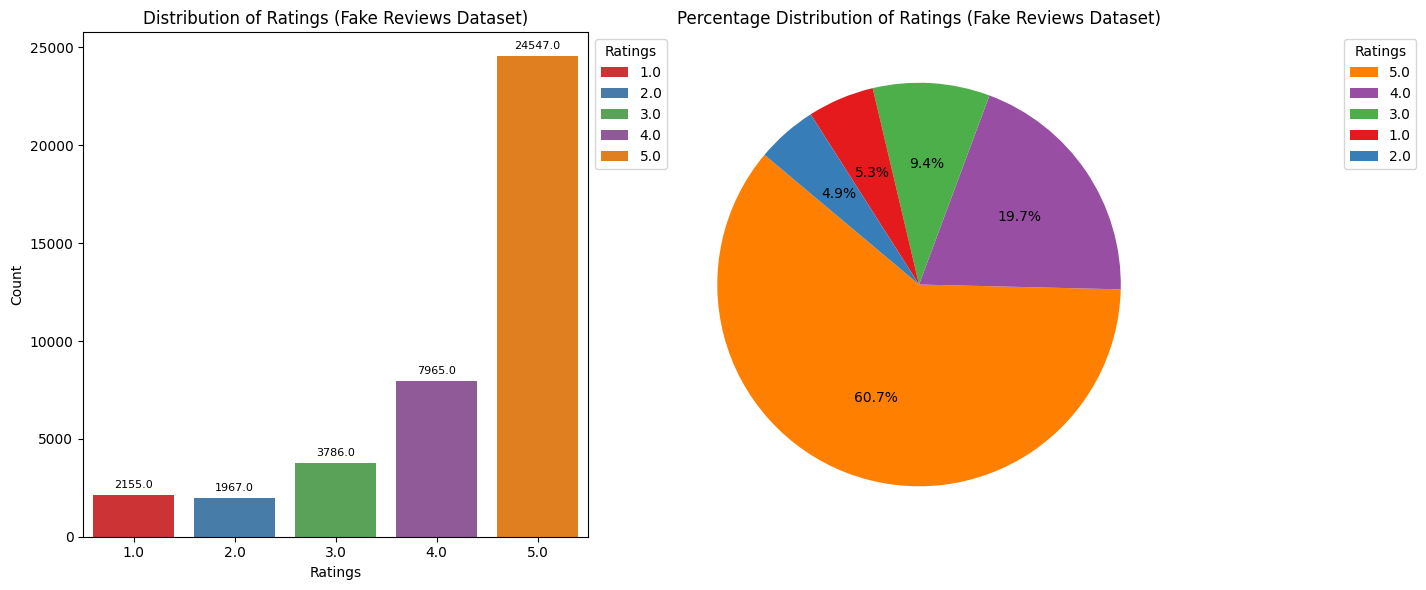

In [20]:
# Set up the plot for Fake Reviews countplot
plt.figure(figsize=(14, 6))

# Choose a color palette from Set1 with a fixed number of colors
set1_colors = sns.color_palette("Set1", n_colors=5)

# Define a mapping of ratings to colors from the Set1 palette
rating_colors_fake_reviews = {
    1.0: set1_colors[0],  # First color (Red)
    2.0: set1_colors[1],  # Second color (Blue)
    3.0: set1_colors[2],  # Third color (Green)
    4.0: set1_colors[3],  # Fourth color (Orange)
    5.0: set1_colors[4]   # Fifth color (Yellow)
}

# Plot the countplot with hue set to 'rating'
ax_fake_reviews = plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.countplot(x='rating', data=fake_reviews_df, hue='rating', palette=rating_colors_fake_reviews)

# Add title
plt.title("Distribution of Ratings (Fake Reviews Dataset)")
plt.xlabel("Ratings")  # Customize the x-axis label
plt.ylabel("Count")    # Customize the y-axis label

# Add number on top of each bar
for p in ax_fake_reviews.patches:
    height = p.get_height()
    # Only annotate if the height is greater than 0
    if height > 0:
        ax_fake_reviews.annotate(f'{height}', 
                                (p.get_x() + p.get_width() / 2., height), 
                                ha='center', va='baseline',
                                fontsize=8, color='black', xytext=(0, 5), 
                                textcoords='offset points')

# Show legend outside the plot
plt.legend(title='Ratings', loc='upper left', bbox_to_anchor=(1, 1))  # Adjust position here

# Create a pie chart for the percentage distribution of ratings
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
rating_counts_fake_reviews = fake_reviews_df['rating'].value_counts()
wedges_fake_reviews, texts_fake_reviews, autotexts_fake_reviews = plt.pie(
    rating_counts_fake_reviews, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=[rating_colors_fake_reviews[rating] for rating in rating_counts_fake_reviews.index]
)

# Add title for the pie chart
plt.title("Percentage Distribution of Ratings (Fake Reviews Dataset)")

# Create a legend with the corresponding colors
plt.legend(wedges_fake_reviews, rating_counts_fake_reviews.index, title="Ratings", loc="best", bbox_to_anchor=(1, 0, 0.5, 1))

# Adjust layout and show the plot
plt.tight_layout()  # Adjust layout to make room for the legend
plt.show()


## Yelp dataset

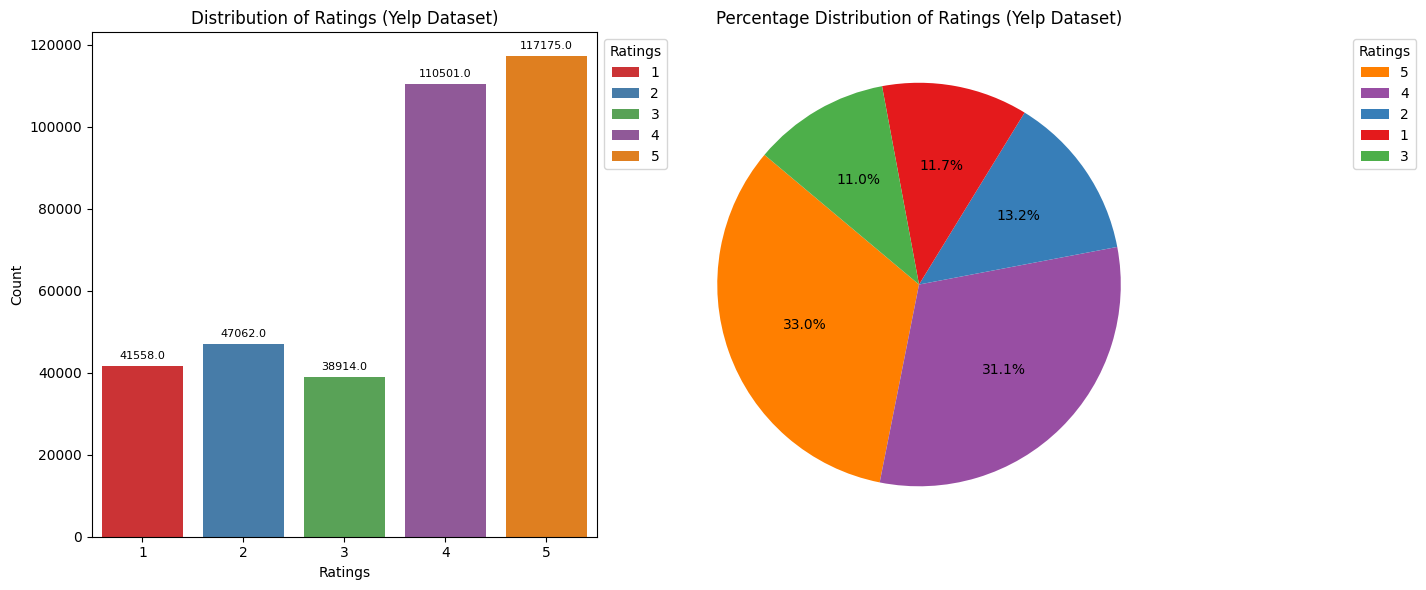

In [21]:
# Set up the plot for Yelp Dataset countplot
plt.figure(figsize=(14, 6))

# Choose a color palette from Set1 with a fixed number of colors
set1_colors = sns.color_palette("Set1", n_colors=5)

# Define a mapping of ratings to colors from the Set1 palette
rating_colors_yelp = {
    1.0: set1_colors[0],  # First color (Red)
    2.0: set1_colors[1],  # Second color (Blue)
    3.0: set1_colors[2],  # Third color (Green)
    4.0: set1_colors[3],  # Fourth color (Orange)
    5.0: set1_colors[4]   # Fifth color (Yellow)
}

# Plot the countplot with hue set to 'Rating'
ax_yelp = plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.countplot(x='Rating', data=yelp_df, hue='Rating', palette=rating_colors_yelp)

# Add title
plt.title("Distribution of Ratings (Yelp Dataset)")
plt.xlabel("Ratings")  # Customize the x-axis label
plt.ylabel("Count")    # Customize the y-axis label

# Add number on top of each bar
for p in ax_yelp.patches:
    height = p.get_height()
    # Only annotate if the height is greater than 0
    if height > 0:
        ax_yelp.annotate(f'{height}', 
                         (p.get_x() + p.get_width() / 2., height), 
                         ha='center', va='baseline',
                         fontsize=8, color='black', xytext=(0, 5), 
                         textcoords='offset points')

# Show legend outside the plot
plt.legend(title='Ratings', loc='upper left', bbox_to_anchor=(1, 1))  # Adjust position here

# Create a pie chart for the percentage distribution of ratings
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
rating_counts_yelp = yelp_df['Rating'].value_counts()
wedges_yelp, texts_yelp, autotexts_yelp = plt.pie(
    rating_counts_yelp, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=[rating_colors_yelp[rating] for rating in rating_counts_yelp.index]
)

# Add title for the pie chart
plt.title("Percentage Distribution of Ratings (Yelp Dataset)")

# Create a legend with the corresponding colors
plt.legend(wedges_yelp, rating_counts_yelp.index, title="Ratings", loc="best", bbox_to_anchor=(1, 0, 0.5, 1))

# Adjust layout and show the plot
plt.tight_layout()  # Adjust layout to make room for the legend
plt.show()


# Distribution of target variable

## Fake Reviews dataset

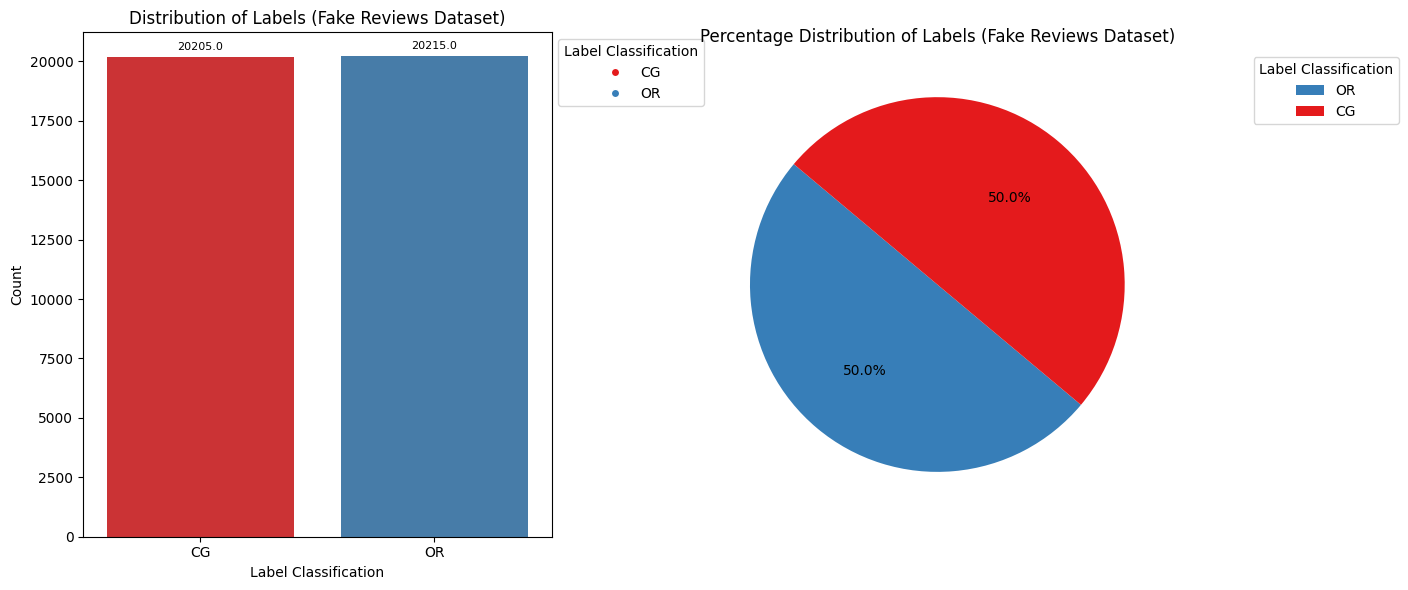

In [22]:
# Choose a color palette for fake reviews dataset
unique_labels_fake_reviews = fake_reviews_df['label'].unique()
colors_fake_review_label = sns.color_palette("Set1", n_colors=len(unique_labels_fake_reviews))

# Create a dictionary to map each label to its corresponding color
label_color_map_fake_reviews = dict(zip(unique_labels_fake_reviews, colors_fake_review_label))

# Set up the plot for Fake Reviews label countplot and pie chart
plt.figure(figsize=(14, 6))

# Plot the countplot with hue for fake reviews
ax_fake_reviews = plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.countplot(x='label', data=fake_reviews_df, hue='label', palette=label_color_map_fake_reviews)

# Add title
plt.title("Distribution of Labels (Fake Reviews Dataset)")

# Add axis labels
plt.xlabel("Label Classification")  # Customize the x-axis label
plt.ylabel("Count")                 # Customize the y-axis label

# Add number on top of each bar
for p in ax_fake_reviews.patches:
    height = p.get_height()
    # Only annotate if the height is greater than 0
    if height > 0:
        ax_fake_reviews.annotate(f'{height}', 
                                (p.get_x() + p.get_width() / 2., height), 
                                ha='center', va='baseline',
                                fontsize=8, color='black', xytext=(0, 5), 
                                textcoords='offset points')

# Manually create legend for the countplot
handles_fake_reviews = [plt.Line2D([0], [0], marker='o', color='w', label=label, 
                       markerfacecolor=label_color_map_fake_reviews[label]) for label in unique_labels_fake_reviews]
plt.legend(handles=handles_fake_reviews, title='Label Classification', loc='upper left', bbox_to_anchor=(1, 1))

# Create a pie chart for the percentage distribution of labels
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
label_counts = fake_reviews_df['label'].value_counts()
wedges_fake_review, texts_fake_review, autotexts_fake_review = plt.pie(
    label_counts, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=[label_color_map_fake_reviews[label] for label in label_counts.index]
)

# Add title for the pie chart
plt.title("Percentage Distribution of Labels (Fake Reviews Dataset)")

# Create a legend with the corresponding colors for the pie chart
plt.legend(wedges_fake_review, label_counts.index, title="Label Classification", loc="best", bbox_to_anchor=(1, 0, 0.5, 1))

# Adjust layout and show the plot
plt.tight_layout()  # Adjust layout to make room for the legend
plt.show()


## Yelp dataset

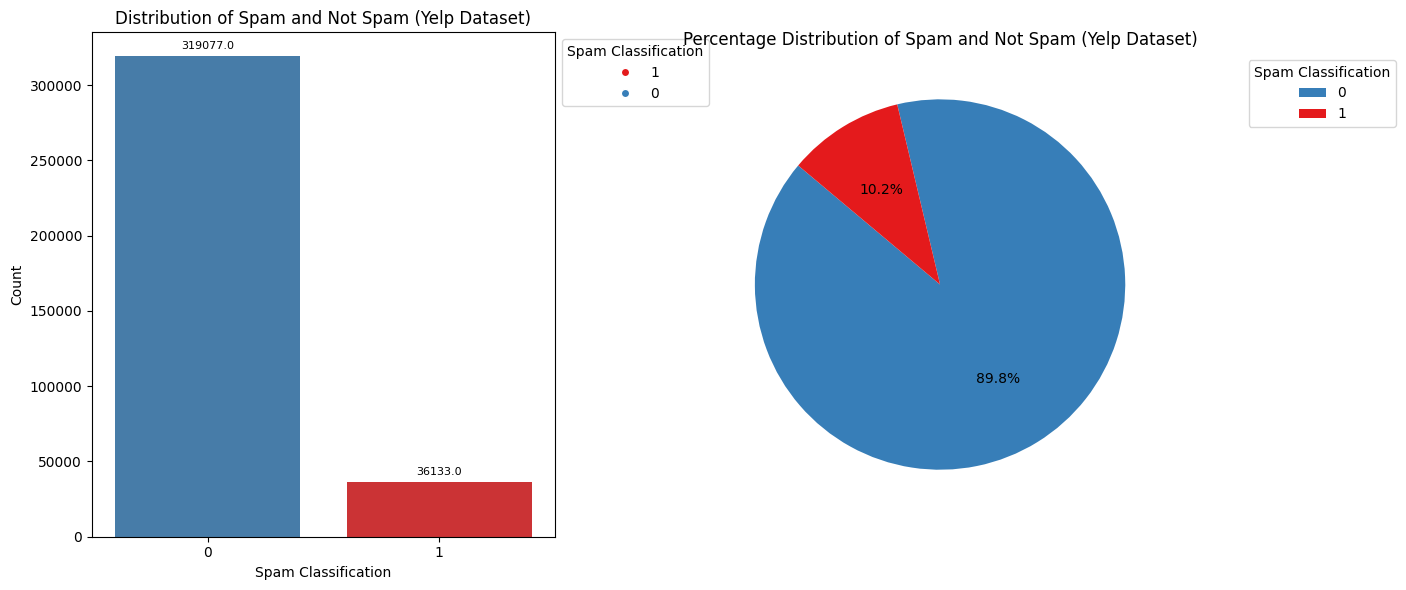

In [23]:
# Choose a color palette for Yelp dataset
unique_labels_yelp = yelp_df['Spam(1) and Not Spam(0)'].unique()
colors_yelp_label = sns.color_palette("Set1", n_colors=len(unique_labels_yelp))

# Create a dictionary to map each label to its corresponding color
label_color_map_yelp = dict(zip(unique_labels_yelp, colors_yelp_label))

# Set up the plot for Yelp dataset countplot and pie chart
plt.figure(figsize=(14, 6))

# Plot the countplot with hue for Yelp dataset
ax_yelp = plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.countplot(x='Spam(1) and Not Spam(0)', data=yelp_df, hue='Spam(1) and Not Spam(0)', palette=label_color_map_yelp)

# Add title
plt.title("Distribution of Spam and Not Spam (Yelp Dataset)")

# Add axis labels
plt.xlabel("Spam Classification")  # Customize the x-axis label
plt.ylabel("Count")                 # Customize the y-axis label

# Add number on top of each bar
for p in ax_yelp.patches:
    height = p.get_height()
    # Only annotate if the height is greater than 0
    if height > 0:
        ax_yelp.annotate(f'{height}', 
                         (p.get_x() + p.get_width() / 2., height), 
                         ha='center', va='baseline',
                         fontsize=8, color='black', xytext=(0, 5), 
                         textcoords='offset points')

# Manually create legend for the countplot
handles_yelp = [plt.Line2D([0], [0], marker='o', color='w', label=str(label), 
                             markerfacecolor=label_color_map_yelp[label]) for label in unique_labels_yelp]
plt.legend(handles=handles_yelp, title='Spam Classification', loc='upper left', bbox_to_anchor=(1, 1))

# Create a pie chart for the percentage distribution of spam labels
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
spam_counts = yelp_df['Spam(1) and Not Spam(0)'].value_counts()
wedges_yelp, texts_yelp, autotexts_yelp = plt.pie(
    spam_counts, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=[label_color_map_yelp[label] for label in spam_counts.index]
)

# Add title for the pie chart
plt.title("Percentage Distribution of Spam and Not Spam (Yelp Dataset)")

# Create a legend with the corresponding colors for the pie chart
plt.legend(wedges_yelp, spam_counts.index, title="Spam Classification", loc="best", bbox_to_anchor=(1, 0, 0.5, 1))

# Adjust layout and show the plot
plt.tight_layout()  # Adjust layout to make room for the legend
plt.show()


# Graphs between ratings and target variable

## Distribution of ratings by target variable

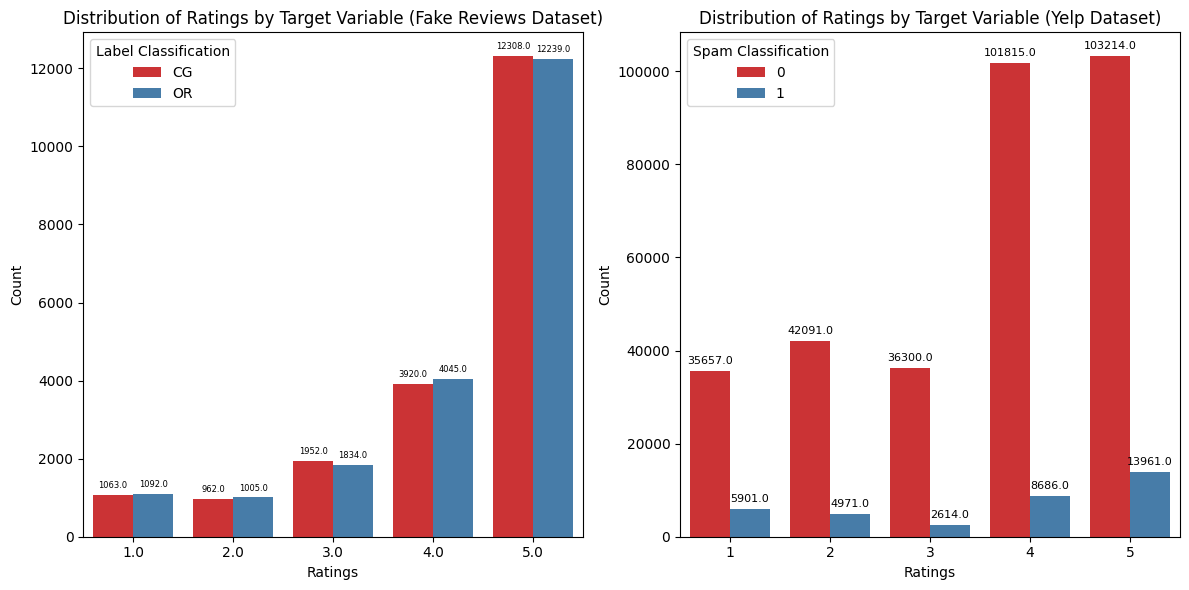

In [24]:
# Set up the plot for both datasets
plt.figure(figsize=(12, 6))

# Create a countplot for Fake Reviews
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.countplot(x='rating', hue='label', data=fake_reviews_df, palette='Set1')
plt.title("Distribution of Ratings by Target Variable (Fake Reviews Dataset)")
plt.xlabel("Ratings")
plt.ylabel("Count")
plt.legend(title='Label Classification')

# Add annotations for Fake Reviews, only if height > 0
for p in plt.gca().patches:
    height = p.get_height()
    if height > 0:  # Only annotate if height is greater than zero
        plt.annotate(f'{height}', 
                     (p.get_x() + p.get_width() / 2., height), 
                     ha='center', va='baseline', fontsize=6, 
                     color='black', xytext=(0, 5), 
                     textcoords='offset points')

# Create a countplot for Yelp Dataset
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
sns.countplot(x='Rating', hue='Spam(1) and Not Spam(0)', data=yelp_df, palette='Set1')
plt.title("Distribution of Ratings by Target Variable (Yelp Dataset)")
plt.xlabel("Ratings")
plt.ylabel("Count")
plt.legend(title='Spam Classification')

# Add annotations for Yelp Dataset, only if height > 0
for p in plt.gca().patches:
    height = p.get_height()
    if height > 0:  # Only annotate if height is greater than zero
        plt.annotate(f'{height}', 
                     (p.get_x() + p.get_width() / 2., height), 
                     ha='center', va='baseline', fontsize=8, 
                     color='black', xytext=(0, 5), 
                     textcoords='offset points')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

## Distribution of target variable by ratings

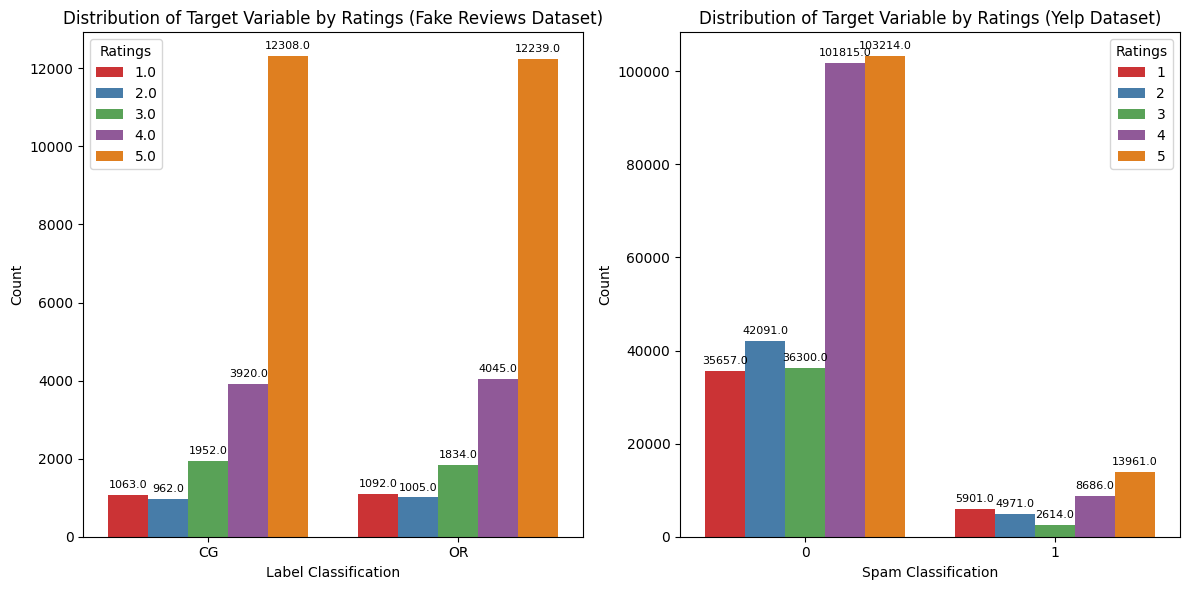

In [25]:
# Set up the plot for both datasets
plt.figure(figsize=(12, 6))

# Create a countplot for Fake Reviews by Target Variable
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.countplot(x='label', hue='rating', data=fake_reviews_df, palette='Set1')
plt.title("Distribution of Target Variable by Ratings (Fake Reviews Dataset)")
plt.xlabel("Label Classification")
plt.ylabel("Count")
plt.legend(title='Ratings')

# Add annotations for Fake Reviews, only if height > 0
for p in plt.gca().patches:
    height = p.get_height()
    if height > 0:  # Only annotate if height is greater than zero
        plt.annotate(f'{height}', 
                     (p.get_x() + p.get_width() / 2., height), 
                     ha='center', va='baseline', fontsize=8, 
                     color='black', xytext=(0, 5), 
                     textcoords='offset points')

# Create a countplot for Yelp Dataset by Target Variable
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
sns.countplot(x='Spam(1) and Not Spam(0)', hue='Rating', data=yelp_df, palette='Set1')
plt.title("Distribution of Target Variable by Ratings (Yelp Dataset)")
plt.xlabel("Spam Classification")
plt.ylabel("Count")
plt.legend(title='Ratings')

# Add annotations for Yelp Dataset, only if height > 0
for p in plt.gca().patches:
    height = p.get_height()
    if height > 0:  # Only annotate if height is greater than zero
        plt.annotate(f'{height}', 
                     (p.get_x() + p.get_width() / 2., height), 
                     ha='center', va='baseline', fontsize=8, 
                     color='black', xytext=(0, 5), 
                     textcoords='offset points')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

# Other distributions for Fake Reviews dataset

## Graphs between category and target variable

Distribution of category

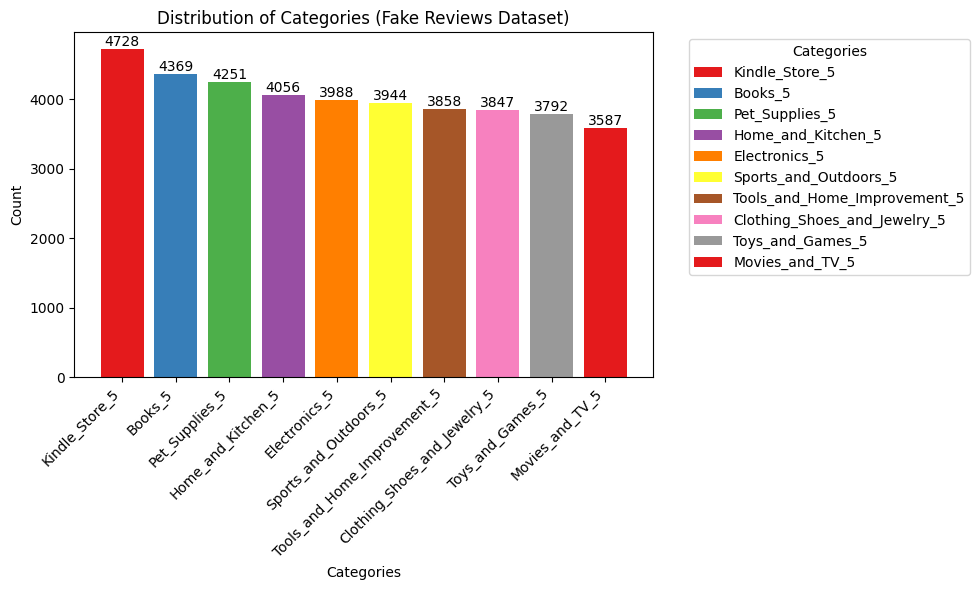

In [26]:
# Choose a color palette for fake reviews
colors_fake_review_category = sns.color_palette("Set1", n_colors=fake_reviews_df['category'].nunique())

# Count occurrences of each category
category_counts = fake_reviews_df['category'].value_counts()

# Create a bar plot using Matplotlib
plt.figure(figsize=(10, 6))
bars = plt.bar(category_counts.index, category_counts.values, color=colors_fake_review_category)

# Add title and labels
plt.title("Distribution of Categories (Fake Reviews Dataset)")
plt.xlabel("Categories")
plt.ylabel("Count")

# Add number on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Create a legend
# Use a list comprehension to create labels
legend_labels = category_counts.index
plt.legend(bars, legend_labels, title="Categories", bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.tight_layout()
plt.show()


Distribution of category by target variable

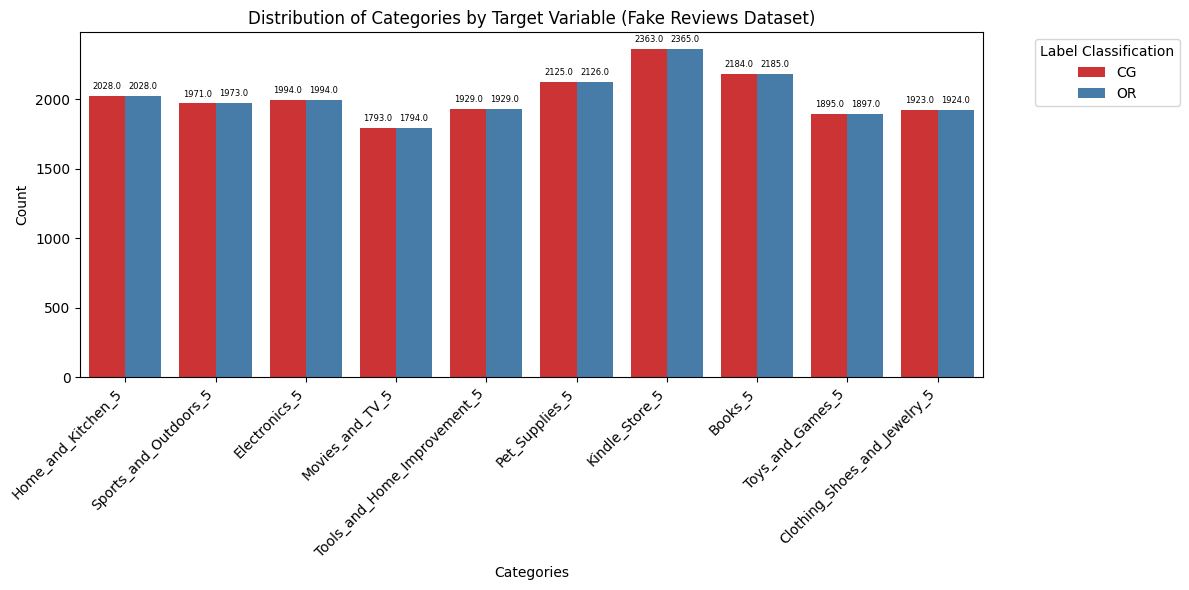

In [27]:
# Set up the plot for Distribution of Category by Target Variable
plt.figure(figsize=(12, 6))

# Create a countplot for Category by Target Variable
sns.countplot(x='category', hue='label', data=fake_reviews_df, palette='Set1')

# Add title and labels
plt.title("Distribution of Categories by Target Variable (Fake Reviews Dataset)")
plt.xlabel("Categories")
plt.ylabel("Count")

# Add annotations for the countplot, only if height > 0
for p in plt.gca().patches:
    height = p.get_height()
    if height > 0:  # Only annotate if height is greater than zero
        plt.annotate(f'{height}', 
                     (p.get_x() + p.get_width() / 2., height), 
                     ha='center', va='baseline', fontsize=6, 
                     color='black', xytext=(0, 5), 
                     textcoords='offset points')

# Rotate x-axis labels for better readability if needed
plt.xticks(rotation=45, ha='right')

# Create a legend outside the plot
plt.legend(title='Label Classification', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.tight_layout()  # Adjust layout
plt.show()

Distribution of target variable by category 

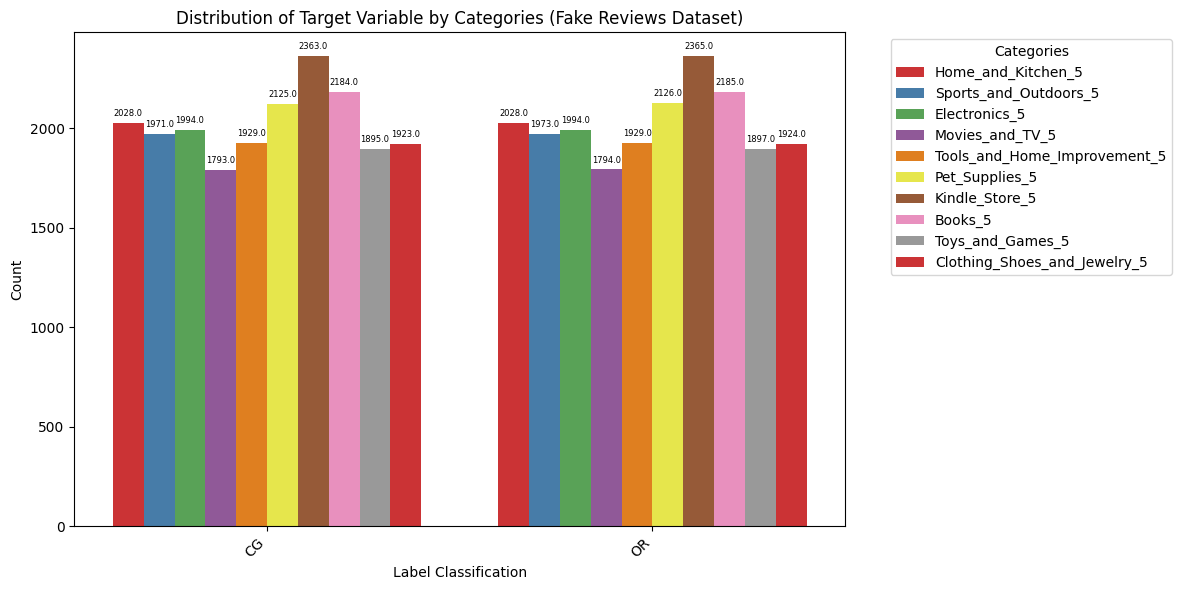

In [28]:
# Set up the plot for Distribution of Target Variable by Category
plt.figure(figsize=(12, 6))

# Create a countplot for Target Variable by Category
sns.countplot(x='label', hue='category', data=fake_reviews_df, palette='Set1')

# Add title and labels
plt.title("Distribution of Target Variable by Categories (Fake Reviews Dataset)")
plt.xlabel("Label Classification")
plt.ylabel("Count")

# Add annotations for the countplot, only if height > 0
for p in plt.gca().patches:
    height = p.get_height()
    if height > 0:  # Only annotate if height is greater than zero
        plt.annotate(f'{height}', 
                     (p.get_x() + p.get_width() / 2., height), 
                     ha='center', va='baseline', fontsize=6, 
                     color='black', xytext=(0, 5), 
                     textcoords='offset points')

# Rotate x-axis labels for better readability if needed
plt.xticks(rotation=45, ha='right')

# Create a legend outside the plot
plt.legend(title='Categories', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.tight_layout()  # Adjust layout
plt.show()


# Other distributions for Yelp dataset

## Graphs between reviews and date

Distribution of reviews by year

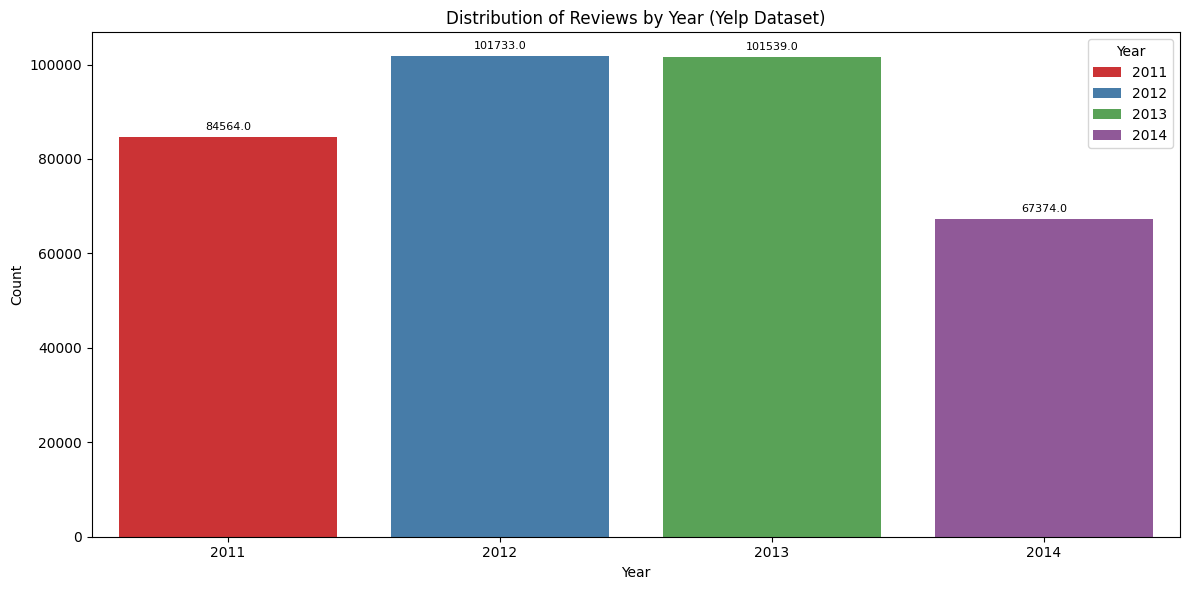

In [29]:
# Extract the year from the date
yelp_df['Year'] = yelp_df['Date'].dt.year

# Set up the plot
plt.figure(figsize=(12, 6))

# Create a countplot for reviews by year
sns.countplot(x='Year', data=yelp_df, palette='Set1', hue='Year')  # Set hue=None to avoid the warning

# Add title and labels
plt.title("Distribution of Reviews by Year (Yelp Dataset)")
plt.xlabel("Year")
plt.ylabel("Count")

# Add annotations for the countplot, only if height > 0
for p in plt.gca().patches:
    height = p.get_height()
    if height > 0:  # Only annotate if height is greater than zero
        plt.annotate(f'{height}', 
                     (p.get_x() + p.get_width() / 2., height), 
                     ha='center', va='baseline', fontsize=8, 
                     color='black', xytext=(0, 5), 
                     textcoords='offset points')

# Show plot
plt.tight_layout()  # Adjust layout
plt.show()


Distribution of reviews by year and month

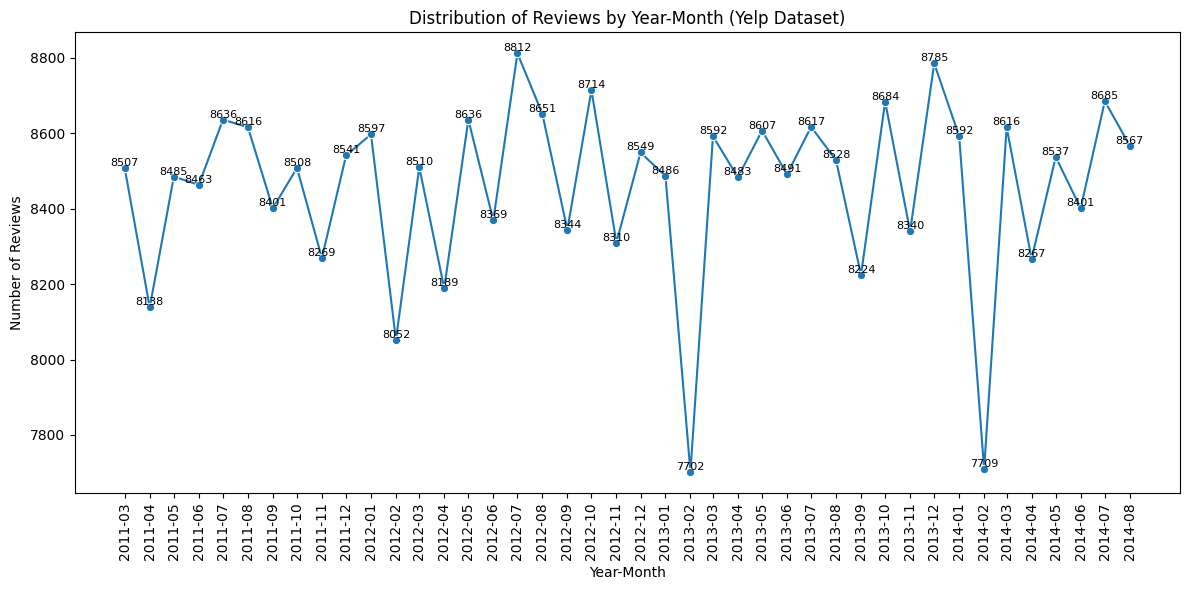

In [30]:
# Extract Year and Month from the 'Date' column
yelp_df['YearMonth'] = yelp_df['Date'].dt.to_period('M')

# Count the number of reviews per month-year
reviews_per_month = yelp_df['YearMonth'].value_counts().sort_index()

# Convert index back to a DatetimeIndex for plotting
reviews_per_month.index = reviews_per_month.index.to_timestamp()

# Create a line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x=reviews_per_month.index, y=reviews_per_month.values, marker='o')

# Add title and labels
plt.title("Distribution of Reviews by Year-Month (Yelp Dataset)")
plt.xlabel("Year-Month")
plt.ylabel("Number of Reviews")

# Annotate each point with the review count
for x, y in zip(reviews_per_month.index, reviews_per_month.values):
    plt.text(x, y, str(y), fontsize=8, ha='center', va='bottom')

# Format x-axis to display Year-Month
plt.xticks(reviews_per_month.index, reviews_per_month.index.strftime('%Y-%m'), rotation=90)

# Show plot
plt.tight_layout()
plt.show()


## Graphs between date and target variable

Distribution of year by target variable and Distribution of target variable by year

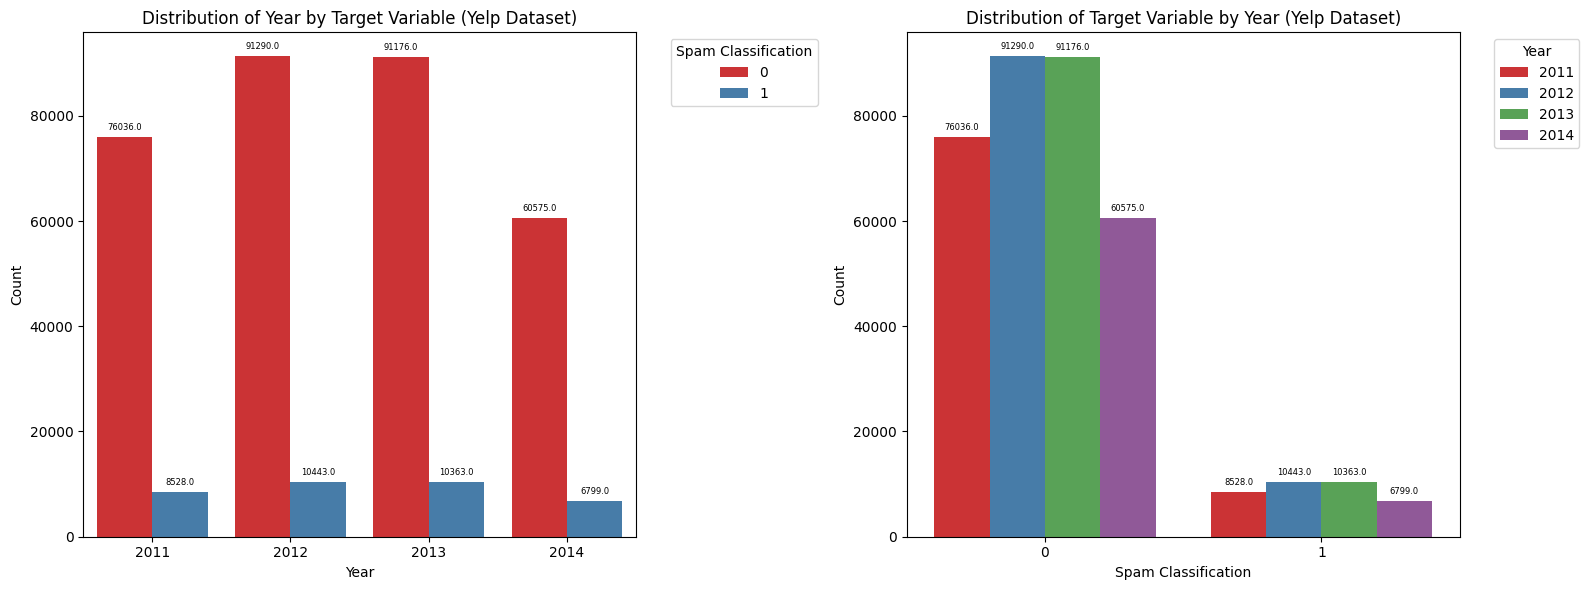

In [31]:
# Set up the figure and subplots for side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# First Plot: Distribution of Year by Target Variable
sns.countplot(x='Year', hue='Spam(1) and Not Spam(0)', data=yelp_df, palette='Set1', ax=axes[0])

# Add title and labels for the first plot
axes[0].set_title("Distribution of Year by Target Variable (Yelp Dataset)")
axes[0].set_xlabel("Year")
axes[0].set_ylabel("Count")

# Add annotations for the first plot, only if height > 0
for p in axes[0].patches:
    height = p.get_height()
    if height > 0:  # Only annotate if height is greater than zero
        axes[0].annotate(f'{height}', 
                         (p.get_x() + p.get_width() / 2., height), 
                         ha='center', va='baseline', fontsize=6, 
                         color='black', xytext=(0, 5), 
                         textcoords='offset points')

# Rotate x-axis labels for better readability if needed
axes[0].tick_params(axis='x', rotation=0)

# Create a legend outside the first plot
axes[0].legend(title='Spam Classification', bbox_to_anchor=(1.05, 1), loc='upper left')

# Second Plot: Distribution of Target Variable by Year
sns.countplot(x='Spam(1) and Not Spam(0)', hue='Year', data=yelp_df, palette='Set1', ax=axes[1])

# Add title and labels for the second plot
axes[1].set_title("Distribution of Target Variable by Year (Yelp Dataset)")
axes[1].set_xlabel("Spam Classification")
axes[1].set_ylabel("Count")

# Add annotations for the second plot, only if height > 0
for p in axes[1].patches:
    height = p.get_height()
    if height > 0:  # Only annotate if height is greater than zero
        axes[1].annotate(f'{height}', 
                         (p.get_x() + p.get_width() / 2., height), 
                         ha='center', va='baseline', fontsize=6, 
                         color='black', xytext=(0, 5), 
                         textcoords='offset points')

# Rotate x-axis labels for better readability if needed
axes[1].tick_params(axis='x', rotation=0)

# Create a legend outside the second plot
axes[1].legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout for both plots
plt.tight_layout()
plt.show()


## Graphs between sentiment and target variable

Distribution of sentiment

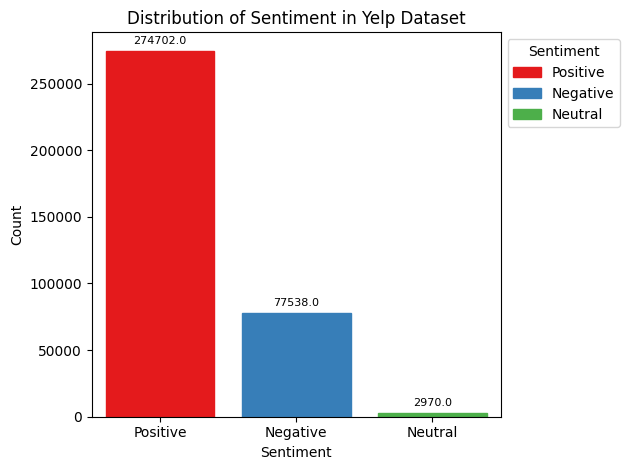

In [32]:
# Check the unique values in 'Sentiment'
unique_sentiments = yelp_df['Sentiment'].unique()

# Create the countplot without 'palette'
ax_yelp = sns.countplot(x='Sentiment', data=yelp_df)

# Manually color each bar using the 'Set1' palette (3 unique colors)
colors_yelp_sentiment = sns.color_palette("Set1", n_colors=3)
for i, bar in enumerate(ax_yelp.patches):
    bar.set_color(colors_yelp_sentiment[i % 3])  # Apply colors cyclically for each sentiment

# Add title and labels
plt.title("Distribution of Sentiment in Yelp Dataset")
plt.xlabel("Sentiment")
plt.ylabel("Count")

# Annotate each bar with the count
for p in ax_yelp.patches:
    height = p.get_height()
    if height > 0:
        ax_yelp.annotate(f'{height}', 
                         (p.get_x() + p.get_width() / 2., height), 
                         ha='center', va='baseline',
                         fontsize=8, color='black', xytext=(0, 5), 
                         textcoords='offset points')

# Manually create the legend
handles = [mpatches.Patch(color=colors_yelp_sentiment[i], label=unique_sentiments[i]) for i in range(3)]
plt.legend(handles=handles, title='Sentiment', loc='upper left', bbox_to_anchor=(1, 1))

# Display the plot
plt.tight_layout()
plt.show()


Distribution of sentiment by target variable and Distribution of target variable by sentiment 

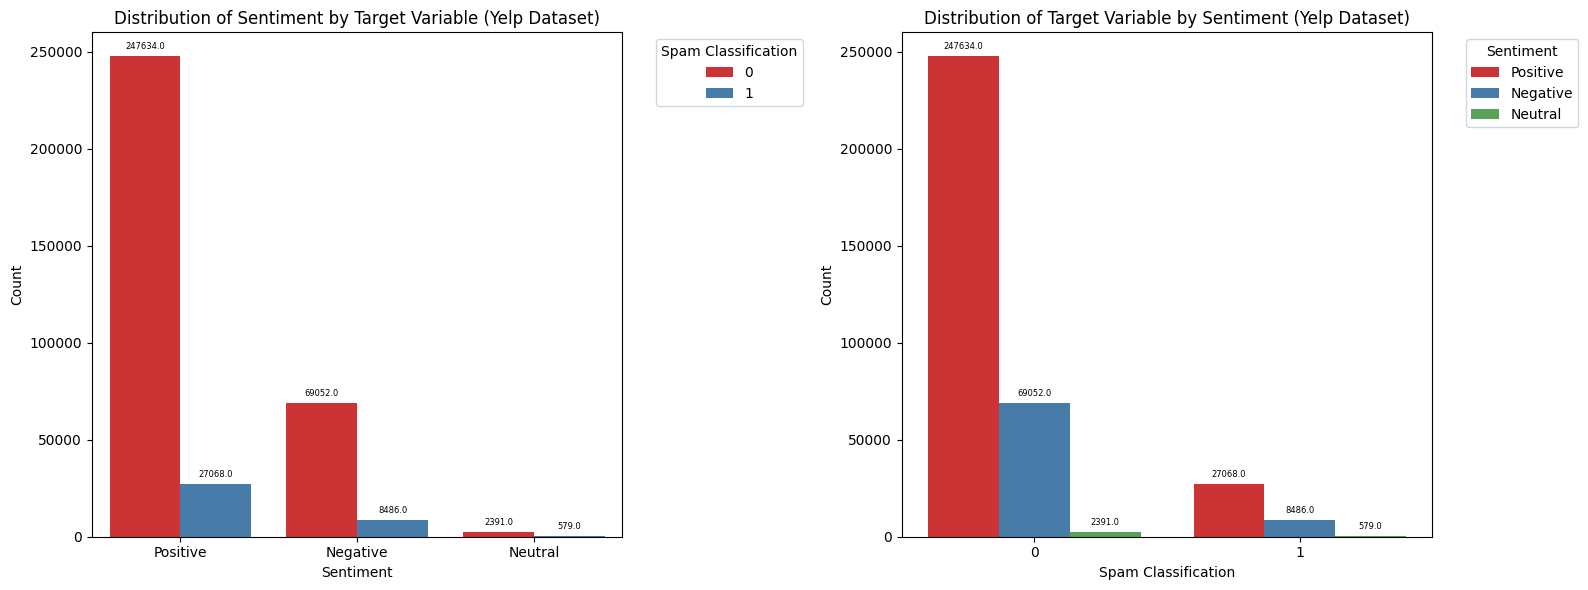

In [33]:
# Set up the figure and subplots for side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# First Plot: Distribution of Sentiment by Target Variable
sns.countplot(x='Sentiment', hue='Spam(1) and Not Spam(0)', data=yelp_df, palette='Set1', ax=axes[0])

# Add title and labels for the first plot
axes[0].set_title("Distribution of Sentiment by Target Variable (Yelp Dataset)")
axes[0].set_xlabel("Sentiment")
axes[0].set_ylabel("Count")

# Add annotations for the first plot, only if height > 0
for p in axes[0].patches:
    height = p.get_height()
    if height > 0:  # Only annotate if height is greater than zero
        axes[0].annotate(f'{height}', 
                         (p.get_x() + p.get_width() / 2., height), 
                         ha='center', va='baseline', fontsize=6, 
                         color='black', xytext=(0, 5), 
                         textcoords='offset points')

# Rotate x-axis labels for better readability if needed
axes[0].tick_params(axis='x', rotation=0)

# Create a legend outside the first plot
axes[0].legend(title='Spam Classification', bbox_to_anchor=(1.05, 1), loc='upper left')

# Second Plot: Distribution of Target Variable by Sentiment
sns.countplot(x='Spam(1) and Not Spam(0)', hue='Sentiment', data=yelp_df, palette='Set1', ax=axes[1])

# Add title and labels for the second plot
axes[1].set_title("Distribution of Target Variable by Sentiment (Yelp Dataset)")
axes[1].set_xlabel("Spam Classification")
axes[1].set_ylabel("Count")

# Add annotations for the second plot, only if height > 0
for p in axes[1].patches:
    height = p.get_height()
    if height > 0:  # Only annotate if height is greater than zero
        axes[1].annotate(f'{height}', 
                         (p.get_x() + p.get_width() / 2., height), 
                         ha='center', va='baseline', fontsize=6, 
                         color='black', xytext=(0, 5), 
                         textcoords='offset points')

# Rotate x-axis labels for better readability if needed
axes[1].tick_params(axis='x', rotation=0)

# Create a legend outside the second plot
axes[1].legend(title='Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout for both plots
plt.tight_layout()
plt.show()


# Pre-processing review text

preprocess_text:

1. Converting to Lowercasing
2. Removing Emojis
3. Normalize Contractions
4. Removing Punctuations
5. Removal of Links
6. Removing Special Characters
7. Removing Mentions
8. Removing Line breakers
9. Removal of UTF-encoding
10. Removing Hashtags
11. Removing Special Characters
12. Removing Extra Whitespaces

lemmatize_and_remove_stopwords:
1. Removing Stopwords
2. Tokenization
3. Lemmatization

In [34]:
def remove_emojis(text):
    """Remove emojis from the text."""
    return demoji.replace(text, '')

def clean_hashtags(review):
    """Remove hashtags from the text."""
    # Remove hashtags at the end of the sentence
    new_review = " ".join(word.strip() for word in re.split(r'#(?!(?:hashtag)\b)[\w\'-]+(?=(?:\s+#[\w\'-]+)*\s*$)', review))
    # Remove '#' symbol from words in the middle of the sentence
    new_review2 = " ".join(word.strip() for word in re.split(r'#|_', new_review))
    return new_review2

def filter_chars(a):
    """Filter out unwanted characters from the text."""
    sent = []
    for word in a.split(' '):
        if ('$' in word) | ('&' in word):
            sent.append('')
        else:
            sent.append(word)
    return ' '.join(sent)

def remove_mult_spaces(text):
    """Remove multiple spaces in the text."""
    return re.sub(r"\s\s+", " ", text)

def normalize_contractions(text):
    """Normalize common English contractions."""
    contractions = {
        "can't": "cannot",
        "won't": "will not",
        "don't": "do not",
        "doesn't": "does not",
        "didn't": "did not",
        "haven't": "have not",
        "hasn't": "has not",
        "isn't": "is not",
        "aren't": "are not",
        "we're": "we are",
        "they're": "they are",
        "i'm": "I am",
        "you're": "you are",
        "it's": "it is",
        "he's": "he is",
        "she's": "she is",
        "i've": "I have",
        "you've": "you have",
        "they've": "they have",
        "that's": "that is",
        "what's": "what is",
        "where's": "where is",
        "who's": "who is",
        "let's": "let us",
        "o'clock": "of the clock",
        "wouldn't": "would not",
        "shouldn't": "should not",
        "couldn't": "could not",
        "would've": "would have",  
        "i'd": "I would",           
        "i'll": "I will",           
        "there's": "there is"       
    }
    # Replace contractions in the text
    for contraction, full in contractions.items():
        text = text.replace(contraction, full)
    return text

def normalize_punctuation(text):
    """Replace multiple consecutive periods and punctuation marks with a single instance and ensure spaces."""
    text = re.sub(r'\.{2,}', '.', text)  # Normalize ellipses
    text = re.sub(r'([!?.])\1+', r'\1', text)  # Normalize multiple punctuation marks
    # Add space after punctuation if not at the end of the string
    text = re.sub(r'([!?.])(?=\S)', r'\1 ', text)  
    return text

def preprocess_text(text: str, remove_stopwords: bool = True) -> str:
    """Preprocess the input text."""

# Check if the input is an integer, float, or contains only numeric characters
    if isinstance(text, (int, float)) or (isinstance(text, str) and text.replace('.', '', 1).isdigit()):
        return ""  # Return an empty string or any placeholder you'd like

    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Convert to lowercase
    text = text.lower()
    # Remove emojis 
    text = remove_emojis(text)
    # Normalize contractions
    text = normalize_contractions(text)
    # Normalize punctuation
    text = normalize_punctuation(text)
    text = re.sub(r'[!.,?;:]', '', text)  
    # Remove double quotes
    text = re.sub(r'"', '', text)
    # Normalize dashes
    text = re.sub(r'-{2,}', '-', text)  # Replace multiple dashes with a single dash
    text = re.sub(r'\s*-\s*', ' ', text)  # Remove isolated dashes
    # Remove links
    text = re.sub(r"(?:\@|https?\://)\S+", "", text)
    # Remove specific special characters
    text = re.sub(r'[\\/×\^\]:,.\[÷]', '', text) 
    # Remove all spaces and line breaks
    text = text.replace('\r', '').replace('\n', '')
    # Remove UTF encodings
    text = re.sub(r'[^\x00-\x7f]', r'', text) 
    # Clean hashtags
    text = clean_hashtags(text)
    # Filter special characters
    text = filter_chars(text)
    # Remove multiple spaces
    text = remove_mult_spaces(text)
    
    return text

def lemmatize_and_remove_stopwords(text, remove_stopwords: bool = True):
    """Lemmatize the text and remove stopwords."""
    special_characters = r'[@_!#$%^&*()<>?/\|}{~:]'
    STOPWORDS = set(stopwords.words('english'))
    lemmatizer = nltk.WordNetLemmatizer()

    if remove_stopwords:
        tokens = nltk.word_tokenize(text)
        tokens = [w for w in tokens if (not all(c in special_characters for c in w)) and (not w.isdigit())]
        tokens = [lemmatizer.lemmatize(w) for w in tokens]
        tokens = [w.lower().strip() for w in tokens if w.lower() not in STOPWORDS]
        return ' '.join(tokens)
    return text

In [ ]:
# Apply the preprocessing function to the 'text_' column in fake_reviews_df
fake_reviews_df['cleaned_text'] = fake_reviews_df['text_'].apply(preprocess_text)

fake_reviews_df['final_cleaned_review'] = fake_reviews_df['cleaned_text'].apply(lemmatize_and_remove_stopwords)

In [ ]:
fake_reviews_cleaned_output_path = '/Users/LeeShan/Fake-Reviews-Detection/ShanShan_notebooks/processed_fake_reviews.csv'

# Save to CSV in the specified output directory
fake_reviews_df.to_csv(fake_reviews_cleaned_output_path, index=False)

In [ ]:
# Apply the preprocessing function to the 'Review' column and convert to string
yelp_df['cleaned_review'] = yelp_df['Review'].apply(preprocess_text)

yelp_df['final_cleaned_review'] = yelp_df['cleaned_review'].apply(lemmatize_and_remove_stopwords)

In [ ]:
yelp_cleaned_output_path = '/Users/LeeShan/Fake-Reviews-Detection/ShanShan_notebooks/processed_yelp.csv'

# Save to CSV in the specified output directory
yelp_df.to_csv(yelp_cleaned_output_path, index=False)

# Reading processed datasets

## Fake Reviews dataset

In [39]:
fake_reviews_cleaned_output_path = '/Users/LeeShan/Fake-Reviews-Detection/ShanShan_notebooks/processed_fake_reviews.csv'

In [40]:
# Read the CSV file
fake_reviews_cleaned_df = pd.read_csv(fake_reviews_cleaned_output_path)

In [41]:
fake_reviews_cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40420 entries, 0 to 40419
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   category              40420 non-null  object 
 1   rating                40420 non-null  float64
 2   label                 40420 non-null  object 
 3   text_                 40420 non-null  object 
 4   cleaned_text          40419 non-null  object 
 5   final_cleaned_review  40419 non-null  object 
dtypes: float64(1), object(5)
memory usage: 1.9+ MB


In [42]:
fake_reviews_cleaned_df.shape

(40420, 6)

In [43]:
fake_reviews_cleaned_df.columns

Index(['category', 'rating', 'label', 'text_', 'cleaned_text',
       'final_cleaned_review'],
      dtype='object')

In [44]:
fake_reviews_cleaned_df.head()

category  rating label  \
0  Home_and_Kitchen_5     5.0    CG   
1  Home_and_Kitchen_5     5.0    CG   
2  Home_and_Kitchen_5     5.0    CG   
3  Home_and_Kitchen_5     1.0    CG   
4  Home_and_Kitchen_5     5.0    CG   

                                               text_  \
0  Love this!  Well made, sturdy, and very comfor...   
1  love it, a great upgrade from the original.  I...   
2  This pillow saved my back. I love the look and...   
3  Missing information on how to use it, but it i...   
4  Very nice set. Good quality. We have had the s...   

                                        cleaned_text  \
0  love this well made sturdy and very comfortabl...   
1  love it a great upgrade from the original I ha...   
2  this pillow saved my back i love the look and ...   
3  missing information on how to use it but it is...   
4  very nice set good quality we have had the set...   

                            final_cleaned_review  
0  love well made sturdy comfortable love pretty  
1   love great upgrade original mine couple year  
2        pillow saved back love look feel pillow  
3    missing information use great product price  
4            nice set good quality set two month

## Yelp dataset

In [45]:
yelp_cleaned_output_path = '/Users/LeeShan/Fake-Reviews-Detection/ShanShan_notebooks/processed_yelp.csv'

In [46]:
# Read the Excel file
yelp_cleaned_df = pd.read_csv(yelp_cleaned_output_path)

In [47]:
yelp_cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355210 entries, 0 to 355209
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   User_id                  355210 non-null  int64 
 1   Product_id               355210 non-null  int64 
 2   Rating                   355210 non-null  int64 
 3   Date                     355210 non-null  object
 4   Review                   355210 non-null  object
 5   Spam(1) and Not Spam(0)  355210 non-null  int64 
 6   Sentiment                355210 non-null  object
 7   Features                 355210 non-null  object
 8   Year                     355210 non-null  int64 
 9   YearMonth                355210 non-null  object
 10  cleaned_review           355201 non-null  object
 11  final_cleaned_review     355198 non-null  object
dtypes: int64(5), object(7)
memory usage: 32.5+ MB


In [48]:
yelp_cleaned_df.shape

(355210, 12)

In [49]:
yelp_cleaned_df.columns

Index(['User_id', 'Product_id', 'Rating', 'Date', 'Review',
       'Spam(1) and Not Spam(0)', 'Sentiment', 'Features', 'Year', 'YearMonth',
       'cleaned_review', 'final_cleaned_review'],
      dtype='object')

In [50]:
yelp_cleaned_df.head()

User_id  Product_id  Rating        Date  \
0      923           0       3  2014-01-30   
1      924           0       3  2011-05-05   
2      925           0       4  2011-12-30   
3      926           0       4  2012-10-04   
4      927           0       4  2014-02-06   

                                              Review  Spam(1) and Not Spam(0)  \
0  The food at snack is a selection of popular Gr...                        1   
1  This little place in Soho is wonderful. I had ...                        1   
2  ordered lunch for 15 from Snack last Friday. Ã...                        1   
3  This is a beautiful quaint little restaurant o...                        1   
4  Snack is great place for a Ã‚Â casual sit down...                        1   

  Sentiment                                           Features  Year  \
0  Positive  ['appetizer tray', 'greek salad', 'main courses']  2014   
1  Positive  ['little place', 'soho', 'lamb sandwich', 'soh...  2011   
2  Positive            ['snack', 'regular company lunch list']  2011   
3  Positive  ['beautiful quaint', 'pretty street', 'great p...  2012   
4  Positive  ['snack', 'great place', 'Ã¢ casual', 'cold wi...  2014   

  YearMonth                                     cleaned_review  \
0   2014-01  the food at snack is a selection of popular gr...   
1   2011-05  this little place in soho is wonderful i had a...   
2   2011-12  ordered lunch for from snack last friday on ti...   
3   2012-10  this is a beautiful quaint little restaurant o...   
4   2014-02  snack is great place for a casual sit down lun...   

                                final_cleaned_review  
0  food snack selection popular greek dish appeti...  
1  little place soho wonderful lamb sandwich glas...  
2  ordered lunch snack last friday time nothing m...  
3  beautiful quaint little restaurant pretty stre...  
4  snack great place casual sit lunch especially ...

# Check for missing values

## Fake Reviews dataset

In [51]:
# Check for missing values
fake_reviews_cleaned_df.isnull().sum()

category                0
rating                  0
label                   0
text_                   0
cleaned_text            1
final_cleaned_review    1
dtype: int64

In [52]:
# Print all rows where any column has NA values
na_rows_fake_reviews_cleaned = fake_reviews_cleaned_df[fake_reviews_cleaned_df.isna().any(axis=1)]

In [53]:
na_rows_fake_reviews_cleaned

category  rating label                     text_  \
37902  Clothing_Shoes_and_Jewelry_5     4.0    CG  .   .                      

      cleaned_text final_cleaned_review  
37902          NaN                  NaN

In [54]:
# Drop rows with any NA values from the DataFrame
fake_reviews_cleaned_new_df = fake_reviews_cleaned_df.dropna()

In [55]:
fake_reviews_cleaned_new_df.isnull().sum()

category                0
rating                  0
label                   0
text_                   0
cleaned_text            0
final_cleaned_review    0
dtype: int64

## Yelp dataset

In [56]:
# Check for missing values
yelp_cleaned_df.isnull().sum()

User_id                     0
Product_id                  0
Rating                      0
Date                        0
Review                      0
Spam(1) and Not Spam(0)     0
Sentiment                   0
Features                    0
Year                        0
YearMonth                   0
cleaned_review              9
final_cleaned_review       12
dtype: int64

In [57]:
# Print all rows where any column has NA values
na_rows_yelp_cleaned = yelp_cleaned_df[yelp_cleaned_df.isna().any(axis=1)]

In [58]:
na_rows_yelp_cleaned

User_id  Product_id  Rating        Date  \
88968     58924         253       4  2014-03-18   
91125     10457         258       5  2011-08-15   
144497    85495         417       5  2012-08-15   
162146    93277         465       1  2014-05-19   
197917   107627         542       5  2011-05-04   
204594   107369         555       2  2012-01-28   
204643   110640         555       3  2011-08-11   
204946   110853         555       5  2013-11-30   
227484    66642         604       5  2013-12-13   
272911   135500         719       1  2011-12-23   
273334   135652         722       3  2013-03-14   
286236     4296         759       4  2013-07-02   

                                                   Review  \
88968                                    ................   
91125                                          Just do it   
144497                                      is what it is   
162146                                                ...   
197917                                                  5   
204594                                 ..................   
204643                                                  ?   
204946  Ã£Ââ€žÃ£ÂÂ¤Ã£â€šâ€šÃ©â€¢Â·Ã¨â€ºâ€¡Ã£ÂÂ®Ã¥Ë†...   
227484                                      #fuckingsolid   
272911                                                 :(   
273334                                                 ..   
286236                                               ....   

        Spam(1) and Not Spam(0) Sentiment  \
88968                         0   Neutral   
91125                         0   Neutral   
144497                        0   Neutral   
162146                        0   Neutral   
197917                        1   Neutral   
204594                        1   Neutral   
204643                        1   Neutral   
204946                        1   Neutral   
227484                        0   Neutral   
272911                        0  Negative   
273334                        0   Neutral   
286236                        0   Neutral   

                                                 Features  Year YearMonth  \
88968                             ['... ... ... ... ...']  2014   2014-03   
91125                                                  []  2011   2011-08   
144497                                                 []  2012   2012-08   
162146                                                 []  2014   2014-05   
197917                                                 []  2011   2011-05   
204594                        ['... ... ... ... ... ...']  2012   2012-01   
204643                                                 []  2011   2011-08   
204946  ['Ã£\x81â€žÃ£\x81Â¤Ã£â€šâ€šÃ©â€¢Â·Ã¨â€ºâ€¡Ã£\x...  2013   2013-11   
227484                                 ['# fuckingsolid']  2013   2013-12   
272911                                                 []  2011   2011-12   
273334                                                 []  2013   2013-03   
286236                                                 []  2013   2013-07   

       cleaned_review final_cleaned_review  
88968             NaN                  NaN  
91125      just do it                  NaN  
144497  is what it is                  NaN  
162146            NaN                  NaN  
197917            NaN                  NaN  
204594            NaN                  NaN  
204643            NaN                  NaN  
204946            NaN                  NaN  
227484            NaN                  NaN  
272911              (                  NaN  
273334            NaN                  NaN  
286236            NaN                  NaN

In [59]:
# Drop rows with any NA values from the DataFrame
yelp_cleaned_new_df = yelp_cleaned_df.dropna()

In [60]:
yelp_cleaned_new_df.isnull().sum()

User_id                    0
Product_id                 0
Rating                     0
Date                       0
Review                     0
Spam(1) and Not Spam(0)    0
Sentiment                  0
Features                   0
Year                       0
YearMonth                  0
cleaned_review             0
final_cleaned_review       0
dtype: int64

# Feature engineering

In [61]:
#Count the number of unique words
def count_unique_words(text):
    return len(set(text.split()))

In [62]:
# Function to count punctuation and special characters
def count_punctuation_special(text):
    # Find all punctuation and special characters
    punct_and_special = re.findall(r'[^\w\s]', text)
    return len(punct_and_special)

In [63]:
# Function to count uppercase characters
def count_uppercase_chars(text):
    # Find all uppercase letters in the text
    uppercase_chars = re.findall(r'[A-Z]', text)
    return len(uppercase_chars)

## Fake Reviews dataset

In [64]:
# Create a copy of the DataFrame slice before performing operations
fake_reviews_cleaned_new_df_copy = fake_reviews_cleaned_new_df.copy()

In [65]:
# Word count: counts the number of tokens in the text (separated by a space)
fake_reviews_cleaned_new_df_copy['word_count'] = fake_reviews_cleaned_new_df_copy['cleaned_text'].apply(lambda x: len(str(x).split(" ")))

# Character count: sum the number of characters of each token
fake_reviews_cleaned_new_df_copy['char_count'] = fake_reviews_cleaned_new_df_copy['cleaned_text'].apply(lambda x: sum(len(word) for word in str(x).split(" ")))

# Sentence count: count the number of sentences (separated by a period)
fake_reviews_cleaned_new_df_copy['sentence_count'] = fake_reviews_cleaned_new_df_copy['text_'].apply(lambda x: len(str(x).split(".")))

In [66]:
# Average word length: sum of words length divided by the number of words
fake_reviews_cleaned_new_df_copy['avg_word_length'] = fake_reviews_cleaned_new_df_copy.apply(
    lambda row: row['char_count'] / row['word_count'] if row['word_count'] > 0 else 0, axis=1)

# Average sentence length: sum of sentences length divided by the number of sentences
fake_reviews_cleaned_new_df_copy['avg_sentence_length'] = fake_reviews_cleaned_new_df_copy.apply(
    lambda row: row['word_count'] / row['sentence_count'] if row['sentence_count'] > 0 else 0, axis=1)

In [67]:
# Unique word count: Counts unique words in each review.
fake_reviews_cleaned_new_df_copy['unique_word_count'] = fake_reviews_cleaned_new_df_copy['cleaned_text'].apply(count_unique_words)

# Ratio of unique words to total words.
fake_reviews_cleaned_new_df_copy['unique_vs_words'] = fake_reviews_cleaned_new_df_copy.apply(
    lambda row: row['unique_word_count'] / row['word_count'] if row['word_count'] > 0 else 0, axis=1)

In [68]:
# Stopwords count
stopwords_eng = set(stopwords.words('english'))

fake_reviews_cleaned_new_df_copy['stopwords_count'] = fake_reviews_cleaned_new_df_copy['cleaned_text'].str.split().apply(lambda i: len(set(i) & stopwords_eng))

# Punctuation and special character count
fake_reviews_cleaned_new_df_copy['punctuation_special_count'] = fake_reviews_cleaned_new_df_copy['text_'].apply(count_punctuation_special)

# Uppercase character count
fake_reviews_cleaned_new_df_copy['uppercase_char_count'] = fake_reviews_cleaned_new_df_copy['text_'].apply(count_uppercase_chars)

In [69]:
fake_reviews_cleaned_new_df_copy.head()

category  rating label  \
0  Home_and_Kitchen_5     5.0    CG   
1  Home_and_Kitchen_5     5.0    CG   
2  Home_and_Kitchen_5     5.0    CG   
3  Home_and_Kitchen_5     1.0    CG   
4  Home_and_Kitchen_5     5.0    CG   

                                               text_  \
0  Love this!  Well made, sturdy, and very comfor...   
1  love it, a great upgrade from the original.  I...   
2  This pillow saved my back. I love the look and...   
3  Missing information on how to use it, but it i...   
4  Very nice set. Good quality. We have had the s...   

                                        cleaned_text  \
0  love this well made sturdy and very comfortabl...   
1  love it a great upgrade from the original I ha...   
2  this pillow saved my back i love the look and ...   
3  missing information on how to use it but it is...   
4  very nice set good quality we have had the set...   

                            final_cleaned_review  word_count  char_count  \
0  love well made sturdy comfortable love pretty          13          57   
1   love great upgrade original mine couple year          17          63   
2        pillow saved back love look feel pillow          14          52   
3    missing information use great product price          17          62   
4            nice set good quality set two month          18          66   

   sentence_count  avg_word_length  avg_sentence_length  unique_word_count  \
0               2         4.384615             6.500000                 11   
1               2         3.705882             8.500000                 16   
2               3         3.714286             4.666667                 12   
3               1         3.647059            17.000000                 16   
4               3         3.666667             6.000000                 16   

   unique_vs_words  stopwords_count  punctuation_special_count  \
0         0.846154                5                          5   
1         0.941176                8                          3   
2         0.857143                6                          2   
3         0.941176               10                          2   
4         0.888889               10                          2   

   uppercase_char_count  
0                     4  
1                     1  
2                     2  
3                     2  
4                     3

In [70]:
fake_reviews_cleaned_new_df_copy.groupby('label').describe()

rating                                              word_count  \
         count      mean       std  min  25%  50%  75%  max      count   
label                                                                    
CG     20204.0  4.259503  1.141272  1.0  4.0  5.0  5.0  5.0    20204.0   
OR     20215.0  4.253228  1.147668  1.0  4.0  5.0  5.0  5.0    20215.0   

                  ... punctuation_special_count        uppercase_char_count  \
            mean  ...                       75%    max                count   
label             ...                                                         
CG     62.346417  ...                      10.0  190.0              20204.0   
OR     73.863962  ...                      14.0  312.0              20215.0   

                                                         
            mean        std  min  25%  50%   75%    max  
label                                                    
CG      8.554989  12.788023  0.0  3.0  5.0  10.0  805.0  
OR     11.012614  18.281513  0.0  3.0  5.0  12.0  611.0  

[2 rows x 88 columns]

## Yelp dataset

In [71]:
# Create a copy of the DataFrame slice before performing operations
yelp_cleaned_new_df_copy = yelp_cleaned_new_df.copy()

In [72]:
# Word count: counts the number of tokens in the text (separated by a space)
yelp_cleaned_new_df_copy['word_count'] = yelp_cleaned_new_df_copy['cleaned_review'].apply(lambda x: len(str(x).split(" ")))

# Character count: sum the number of characters of each token
yelp_cleaned_new_df_copy['char_count'] = yelp_cleaned_new_df_copy['cleaned_review'].apply(lambda x: sum(len(word) for word in str(x).split(" ")))

# Sentence count: count the number of sentences (separated by a period)
yelp_cleaned_new_df_copy['sentence_count'] = yelp_cleaned_new_df_copy['Review'].apply(lambda x: len(str(x).split(".")))

In [73]:
# Average word length: sum of words length divided by the number of words
yelp_cleaned_new_df_copy['avg_word_length'] = yelp_cleaned_new_df_copy.apply(
    lambda row: row['char_count'] / row['word_count'] if row['word_count'] > 0 else 0, axis=1)

# Average sentence length: sum of sentences length divided by the number of sentences
yelp_cleaned_new_df_copy['avg_sentence_length'] = yelp_cleaned_new_df_copy.apply(
    lambda row: row['word_count'] / row['sentence_count'] if row['sentence_count'] > 0 else 0, axis=1)

In [74]:
# Unique word count: Counts unique words in each review.
yelp_cleaned_new_df_copy['unique_word_count'] = yelp_cleaned_new_df_copy['cleaned_review'].apply(count_unique_words)

# Ratio of unique words to total words.
yelp_cleaned_new_df_copy['unique_vs_words'] = yelp_cleaned_new_df_copy.apply(
    lambda row: row['unique_word_count'] / row['word_count'] if row['word_count'] > 0 else 0, axis=1)

In [75]:
# Stopwords count
stopwords_eng = set(stopwords.words('english'))

yelp_cleaned_new_df_copy['stopwords_count'] = yelp_cleaned_new_df_copy['cleaned_review'].str.split().apply(lambda i: len(set(i) & stopwords_eng))

# Punctuation and special character count
yelp_cleaned_new_df_copy['punctuation_special_count'] = yelp_cleaned_new_df_copy['Review'].apply(count_punctuation_special)

# Uppercase character count
yelp_cleaned_new_df_copy['uppercase_char_count'] = yelp_cleaned_new_df_copy['Review'].apply(count_uppercase_chars)

In [76]:
yelp_cleaned_new_df_copy.head()

User_id  Product_id  Rating        Date  \
0      923           0       3  2014-01-30   
1      924           0       3  2011-05-05   
2      925           0       4  2011-12-30   
3      926           0       4  2012-10-04   
4      927           0       4  2014-02-06   

                                              Review  Spam(1) and Not Spam(0)  \
0  The food at snack is a selection of popular Gr...                        1   
1  This little place in Soho is wonderful. I had ...                        1   
2  ordered lunch for 15 from Snack last Friday. Ã...                        1   
3  This is a beautiful quaint little restaurant o...                        1   
4  Snack is great place for a Ã‚Â casual sit down...                        1   

  Sentiment                                           Features  Year  \
0  Positive  ['appetizer tray', 'greek salad', 'main courses']  2014   
1  Positive  ['little place', 'soho', 'lamb sandwich', 'soh...  2011   
2  Positive            ['snack', 'regular company lunch list']  2011   
3  Positive  ['beautiful quaint', 'pretty street', 'great p...  2012   
4  Positive  ['snack', 'great place', 'Ã¢ casual', 'cold wi...  2014   

  YearMonth  ... word_count char_count  sentence_count  avg_word_length  \
0   2014-01  ...         40        169               5         4.225000   
1   2011-05  ...         54        209               5         3.870370   
2   2011-12  ...         31        138               4         4.451613   
3   2012-10  ...         90        388               8         4.311111   
4   2014-02  ...        105        473              13         4.504762   

   avg_sentence_length  unique_word_count  unique_vs_words  stopwords_count  \
0             8.000000                 33         0.825000               15   
1            10.800000                 42         0.777778               21   
2             7.750000                 29         0.935484               12   
3            11.250000                 65         0.722222               27   
4             8.076923                 83         0.790476               25   

   punctuation_special_count  uppercase_char_count  
0                          6                     6  
1                         10                     6  
2                          7                     4  
3                         16                     8  
4                         23                    10  

[5 rows x 22 columns]

In [77]:
yelp_cleaned_new_df_copy.groupby('Spam(1) and Not Spam(0)').describe()

User_id                                              \
                            count          mean           std    min      25%   
Spam(1) and Not Spam(0)                                                         
0                        319069.0  51124.247454  44861.299396  937.0  12707.0   
1                         36129.0  79544.750699  46775.555013  923.0  39376.0   

                                                     Product_id              \
                             50%       75%       max      count        mean   
Spam(1) and Not Spam(0)                                                       
0                        36202.0   81594.0  161147.0   319069.0  460.195205   
1                        80151.0  119735.0  161112.0    36129.0  464.609510   

                         ... punctuation_special_count          \
                         ...                       75%     max   
Spam(1) and Not Spam(0)  ...                                     
0                        ...                      28.0  1175.0   
1                        ...                      17.0   268.0   

                        uppercase_char_count                                  \
                                       count       mean        std  min  25%   
Spam(1) and Not Spam(0)                                                        
0                                   319069.0  14.878111  18.398589  0.0  4.0   
1                                    36129.0  10.470868  15.933651  0.0  2.0   

                                           
                         50%   75%    max  
Spam(1) and Not Spam(0)                    
0                        9.0  19.0  801.0  
1                        6.0  13.0  603.0  

[2 rows x 112 columns]

# Distribution of description features by target variable

## Fake Reviews dataset

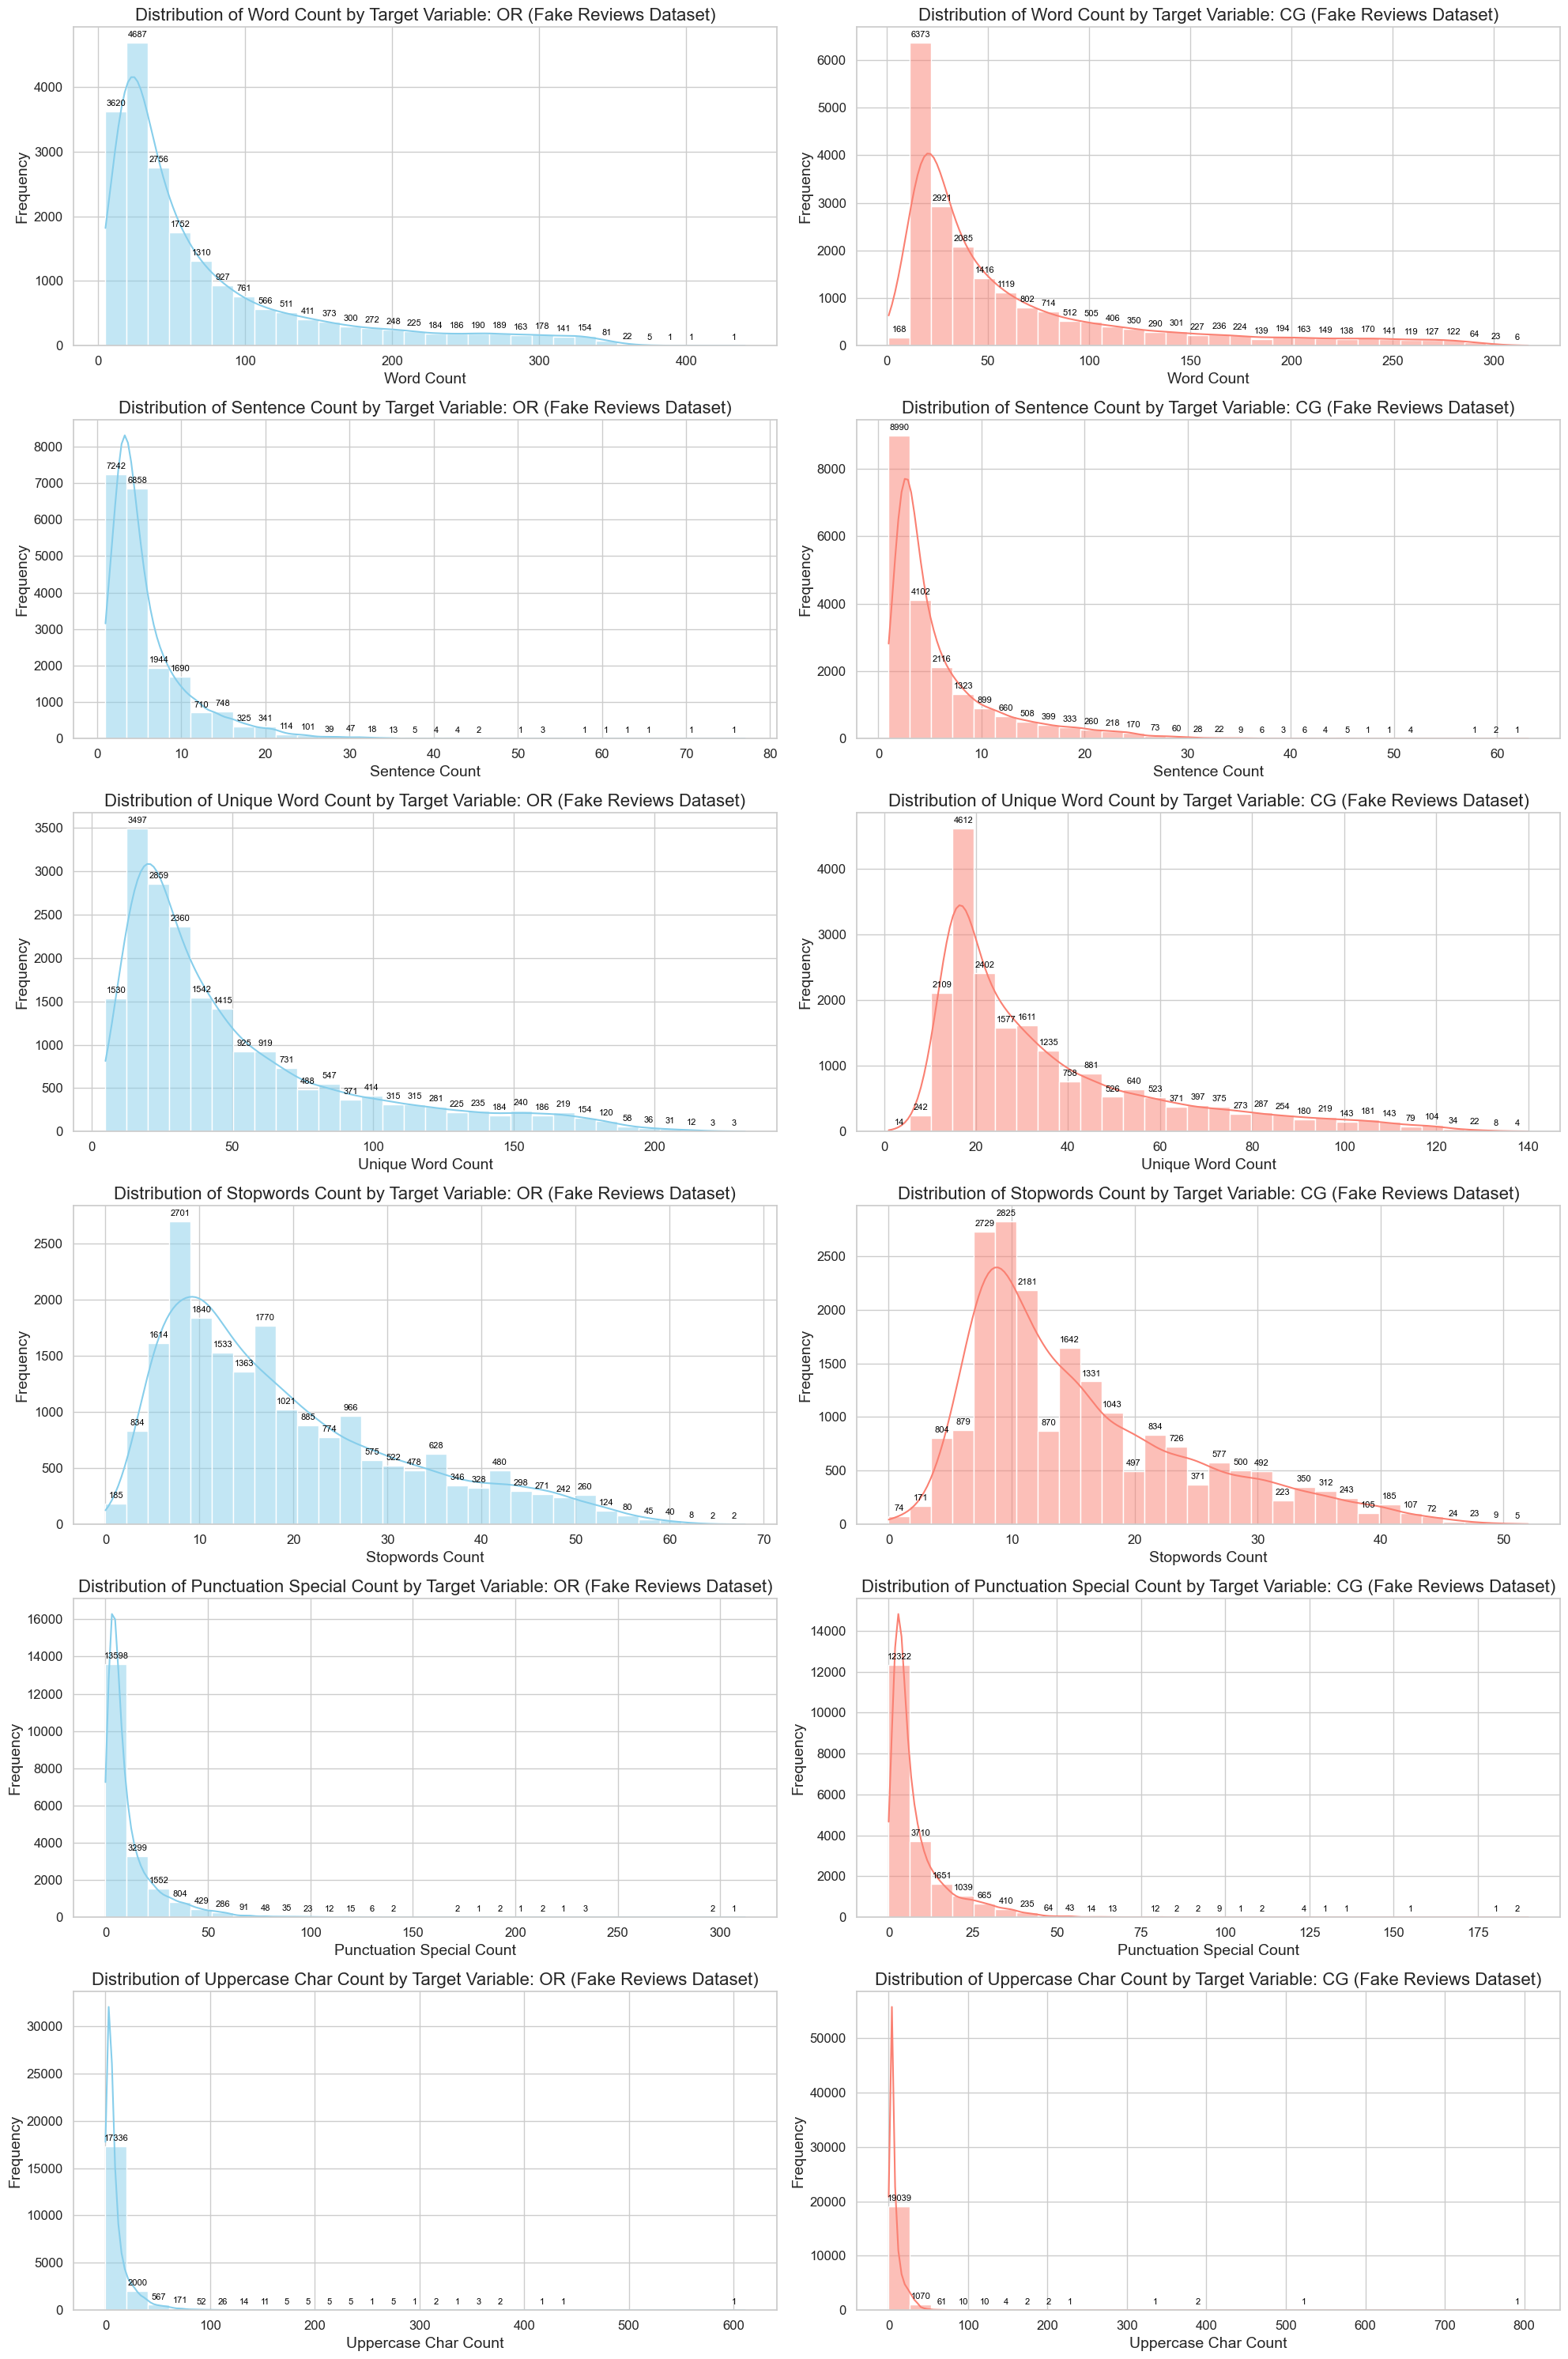

In [78]:
# Set up the Seaborn style
sns.set(style="whitegrid")

# List of features to plot
description_histogram_features = [
    'word_count', 
    'sentence_count',
    'unique_word_count',
    'stopwords_count', 
    'punctuation_special_count',
    'uppercase_char_count'
]

# Calculate the number of rows needed for the subplots (2 columns per row)
num_rows = len(description_histogram_features)

# Create subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(20, num_rows * 5), sharey=False)

# Loop through each feature and create subplots
for i, feature in enumerate(description_histogram_features):
    # Plot for Train Dataset (label == 0)
    hist_plot_train_0 = sns.histplot(fake_reviews_cleaned_new_df_copy[fake_reviews_cleaned_new_df_copy['label'] == 'OR'][feature], bins=30, kde=True, color='skyblue', ax=axes[i, 0])
    axes[i, 0].set_title(f"Distribution of {feature.replace('_', ' ').title()} by Target Variable: OR (Fake Reviews Dataset)", fontsize=16)
    axes[i, 0].set_xlabel(feature.replace('_', ' ').title(), fontsize=14)
    axes[i, 0].set_ylabel("Frequency", fontsize=14)
    axes[i, 0].tick_params(axis='both', which='major', labelsize=12)
    
    # Add counts on top of each bar for fake_reviews_cleaned_new_df_copy (label == 0)
    for p in hist_plot_train_0.patches:
        height = p.get_height()
        if height > 0:  # Only annotate bars that are non-zero
            hist_plot_train_0.annotate(f'{int(height)}', 
                                       (p.get_x() + p.get_width() / 2., height), 
                                       ha='center', va='baseline', fontsize=8, color='black', 
                                       xytext=(0, 5), textcoords='offset points')
    
    # Plot for Train Dataset (label == 1)
    hist_plot_train_1 = sns.histplot(fake_reviews_cleaned_new_df_copy[fake_reviews_cleaned_new_df_copy['label'] == 'CG'][feature], bins=30, kde=True, color='salmon', ax=axes[i, 1])
    axes[i, 1].set_title(f"Distribution of {feature.replace('_', ' ').title()} by Target Variable: CG (Fake Reviews Dataset)", fontsize=16)
    axes[i, 1].set_xlabel(feature.replace('_', ' ').title(), fontsize=14)
    axes[i, 1].set_ylabel("Frequency", fontsize=14)
    axes[i, 1].tick_params(axis='both', which='major', labelsize=12)
    
    # Add counts on top of each bar for fake_reviews_cleaned_new_df_copy (label == 1)
    for p in hist_plot_train_1.patches:
        height = p.get_height()
        if height > 0:  # Only annotate bars that are non-zero
            hist_plot_train_1.annotate(f'{int(height)}', 
                                       (p.get_x() + p.get_width() / 2., height), 
                                       ha='center', va='baseline', fontsize=8, color='black', 
                                       xytext=(0, 5), textcoords='offset points')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


## Yelp dataset

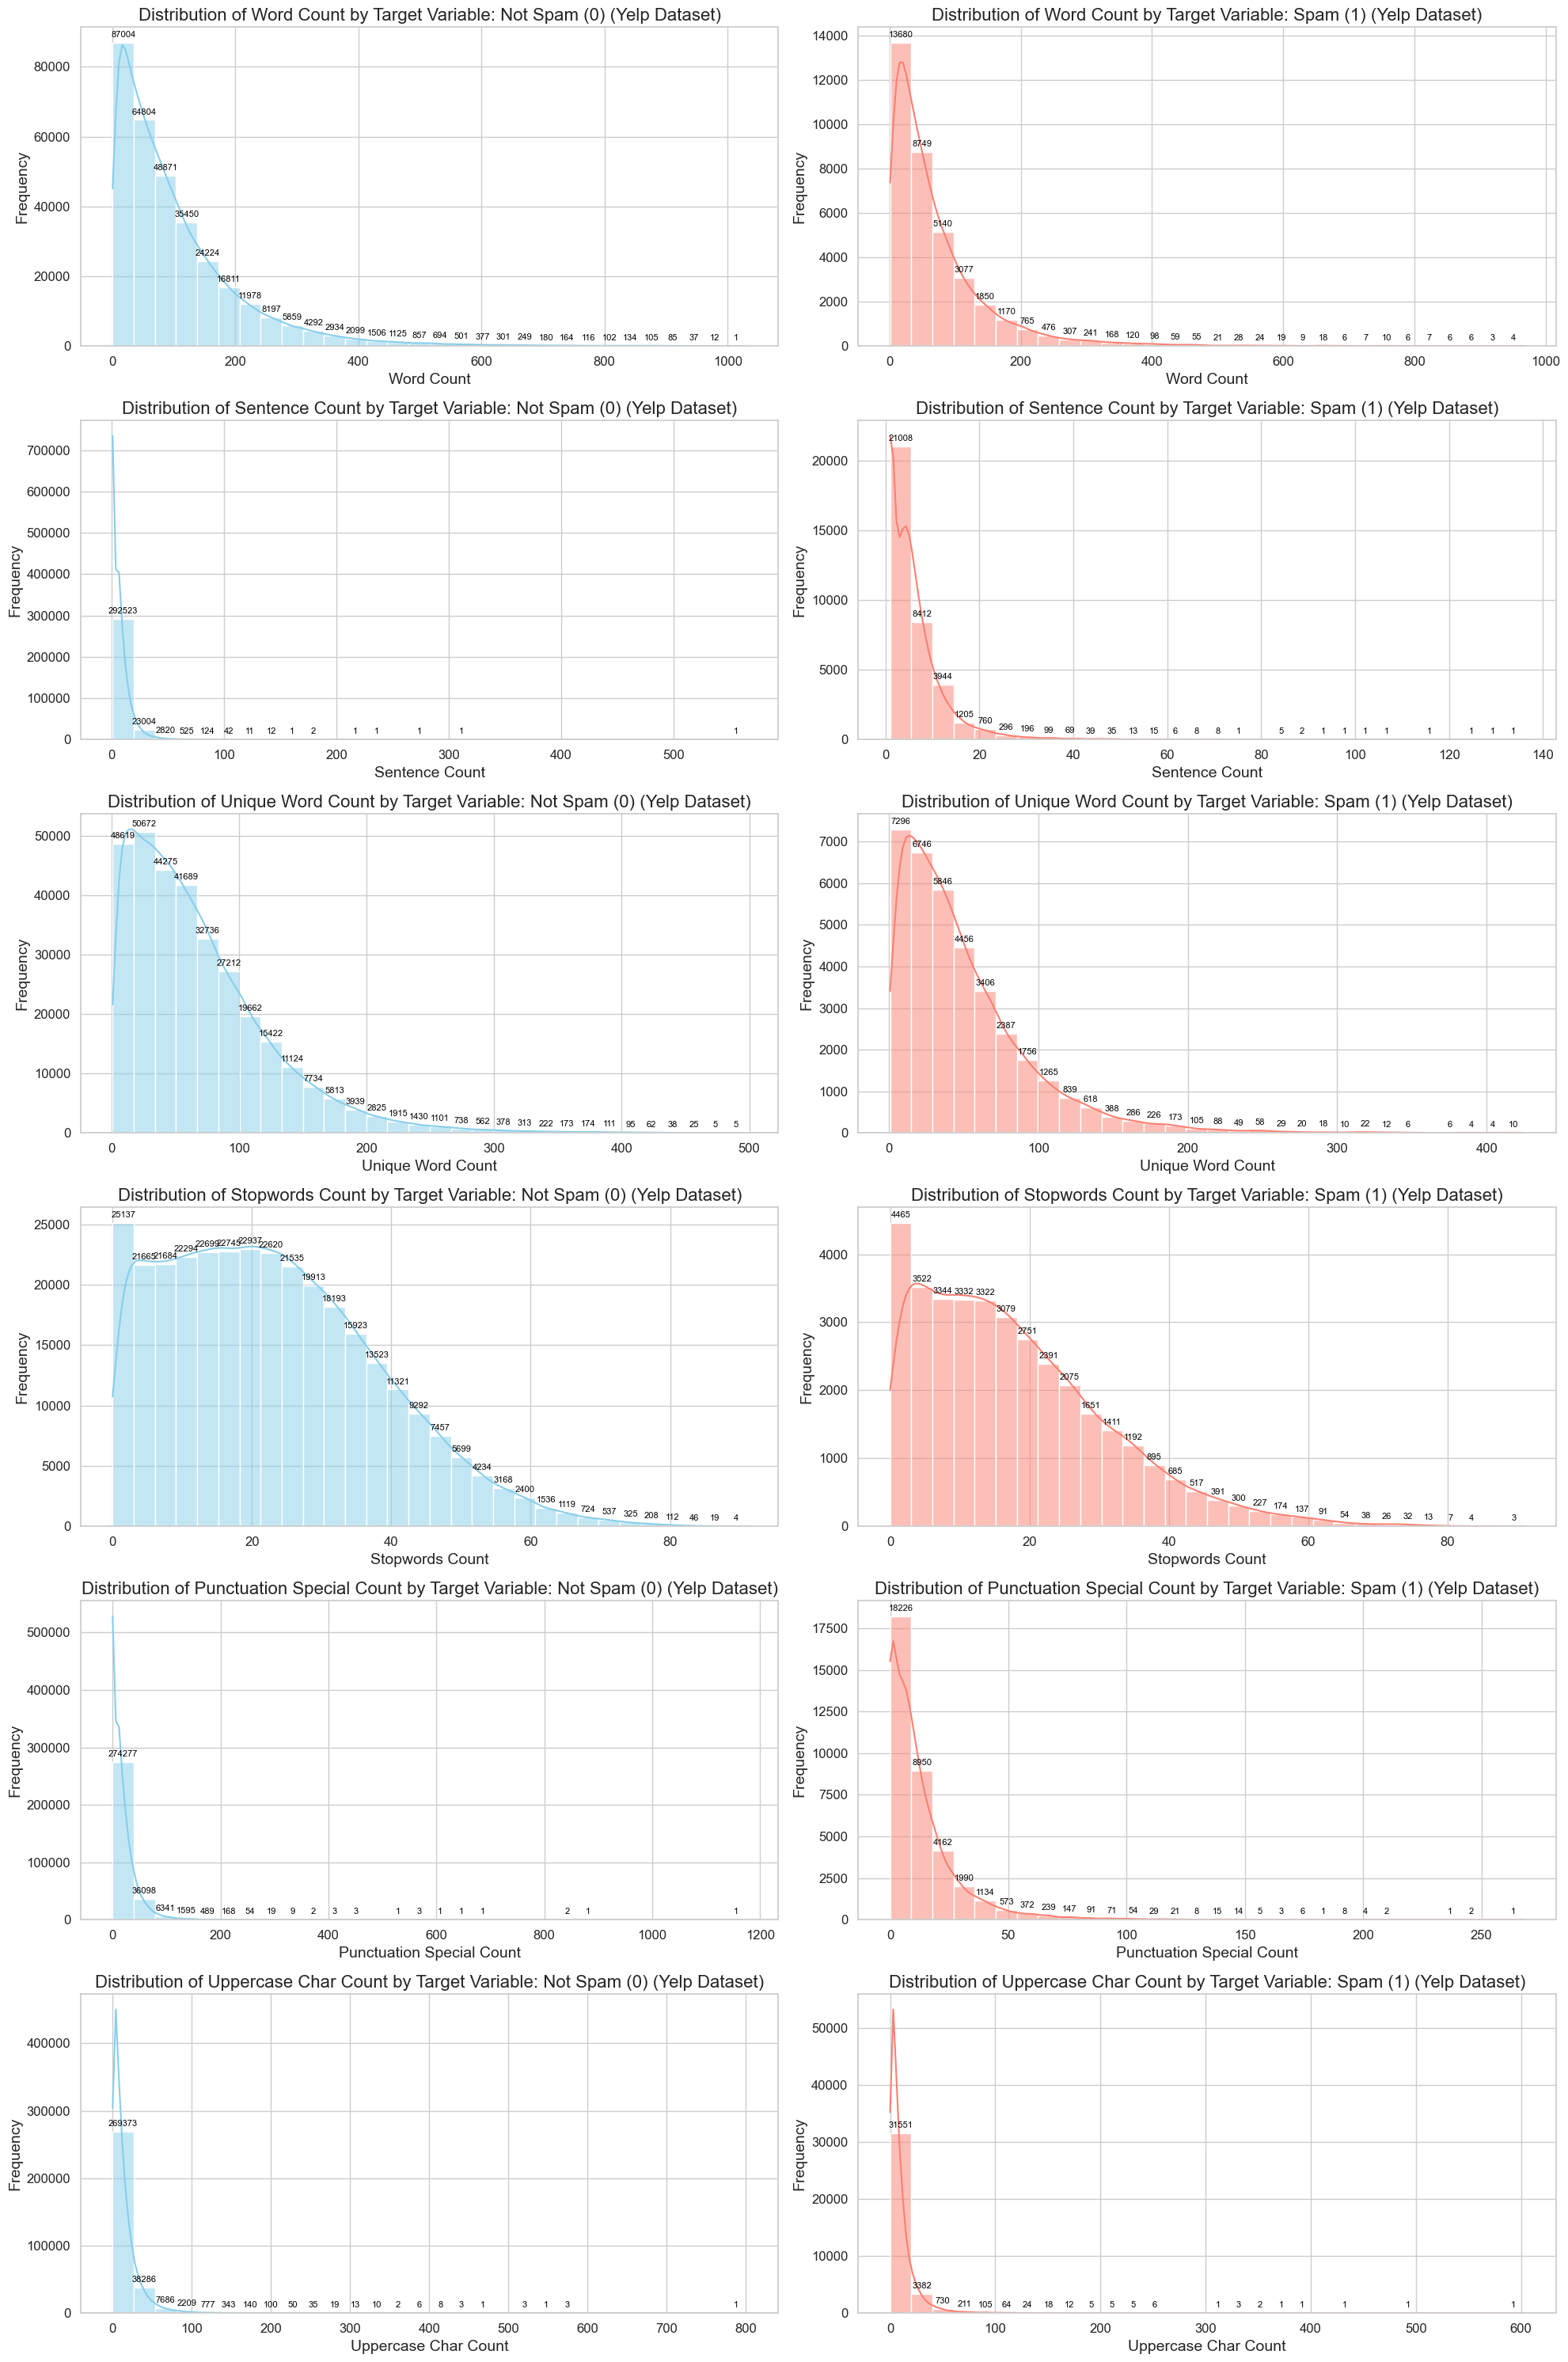

In [79]:
# Set up the Seaborn style
sns.set(style="whitegrid")

# List of features to plot
description_histogram_features = [
    'word_count', 
    'sentence_count',
    'unique_word_count',
    'stopwords_count', 
    'punctuation_special_count',
    'uppercase_char_count'
]

# Calculate the number of rows needed for the subplots (2 columns per row)
num_rows = len(description_histogram_features)

# Create subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(20, num_rows * 5), sharey=False)

# Loop through each feature and create subplots
for i, feature in enumerate(description_histogram_features):
    # Plot for Not Spam (label == 0)
    hist_plot_not_spam = sns.histplot(yelp_cleaned_new_df_copy[yelp_cleaned_new_df_copy['Spam(1) and Not Spam(0)'] == 0][feature], bins=30, kde=True, color='skyblue', ax=axes[i, 0])
    axes[i, 0].set_title(f"Distribution of {feature.replace('_', ' ').title()} by Target Variable: Not Spam (0) (Yelp Dataset)", fontsize=16)
    axes[i, 0].set_xlabel(feature.replace('_', ' ').title(), fontsize=14)
    axes[i, 0].set_ylabel("Frequency", fontsize=14)
    axes[i, 0].tick_params(axis='both', which='major', labelsize=12)
    
    # Add counts on top of each bar for yelp_cleaned_new_df_copy (Not Spam)
    for p in hist_plot_not_spam.patches:
        height = p.get_height()
        if height > 0:  # Only annotate bars that are non-zero
            hist_plot_not_spam.annotate(f'{int(height)}', 
                                         (p.get_x() + p.get_width() / 2., height), 
                                         ha='center', va='baseline', fontsize=8, color='black', 
                                         xytext=(0, 5), textcoords='offset points')
    
    # Plot for Spam (label == 1)
    hist_plot_spam = sns.histplot(yelp_cleaned_new_df_copy[yelp_cleaned_new_df_copy['Spam(1) and Not Spam(0)'] == 1][feature], bins=30, kde=True, color='salmon', ax=axes[i, 1])
    axes[i, 1].set_title(f"Distribution of {feature.replace('_', ' ').title()} by Target Variable: Spam (1) (Yelp Dataset)", fontsize=16)
    axes[i, 1].set_xlabel(feature.replace('_', ' ').title(), fontsize=14)
    axes[i, 1].set_ylabel("Frequency", fontsize=14)
    axes[i, 1].tick_params(axis='both', which='major', labelsize=12)
    
    # Add counts on top of each bar for yelp_cleaned_new_df_copy (Spam)
    for p in hist_plot_spam.patches:
        height = p.get_height()
        if height > 0:  # Only annotate bars that are non-zero
            hist_plot_spam.annotate(f'{int(height)}', 
                                     (p.get_x() + p.get_width() / 2., height), 
                                     ha='center', va='baseline', fontsize=8, color='black', 
                                     xytext=(0, 5), textcoords='offset points')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

# Average word count based on target variable

## Fake Reviews dataset

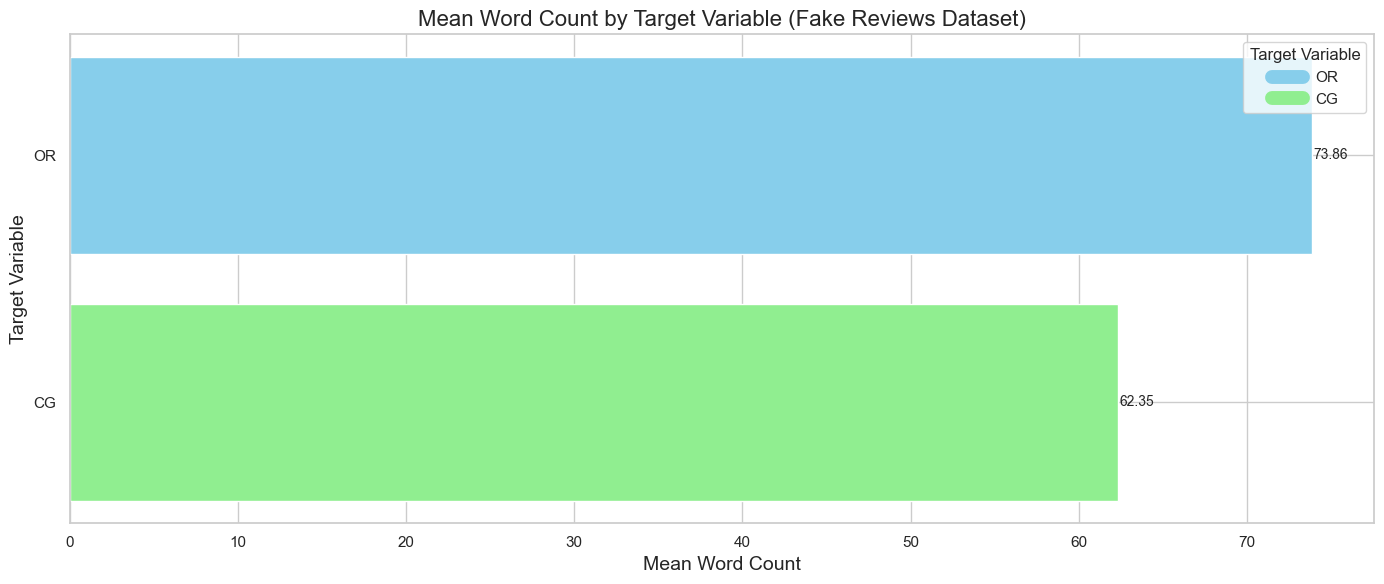

In [80]:
# Calculate mean word_count for fake_reviews_cleaned_new_df_copy based on label
mean_word_count_by_label = fake_reviews_cleaned_new_df_copy.groupby('label')['word_count'].mean().reset_index()

# Color mapping for target values
color_map = {'OR': 'skyblue', 'CG': 'lightgreen'}

# Set up the figure for the horizontal bar chart
fig, ax = plt.subplots(figsize=(14, 6))

# Plot the mean word count for fake_reviews_cleaned_new_df_copy dataset (horizontal)
bars = ax.barh(mean_word_count_by_label['label'], mean_word_count_by_label['word_count'], color=[color_map[label] for label in mean_word_count_by_label['label']])

ax.set_title('Mean Word Count by Target Variable (Fake Reviews Dataset)', fontsize=16)
ax.set_xlabel('Mean Word Count', fontsize=14)
ax.set_ylabel('Target Variable', fontsize=14)

# Adding the mean values at the end of each bar
for i, value in enumerate(mean_word_count_by_label['word_count']):
    ax.text(value + 0.1, i, f'{value:.2f}', va='center', fontsize=10)

# Custom legend for label classification
legend_labels = ['OR', 'CG']  # Use the actual label values
handles = [plt.Line2D([0], [0], color=color_map[label], lw=10) for label in legend_labels]
ax.legend(handles, legend_labels, title="Target Variable", loc='upper right')

# Adjust layout
plt.tight_layout()
plt.show()

## Yelp dataset

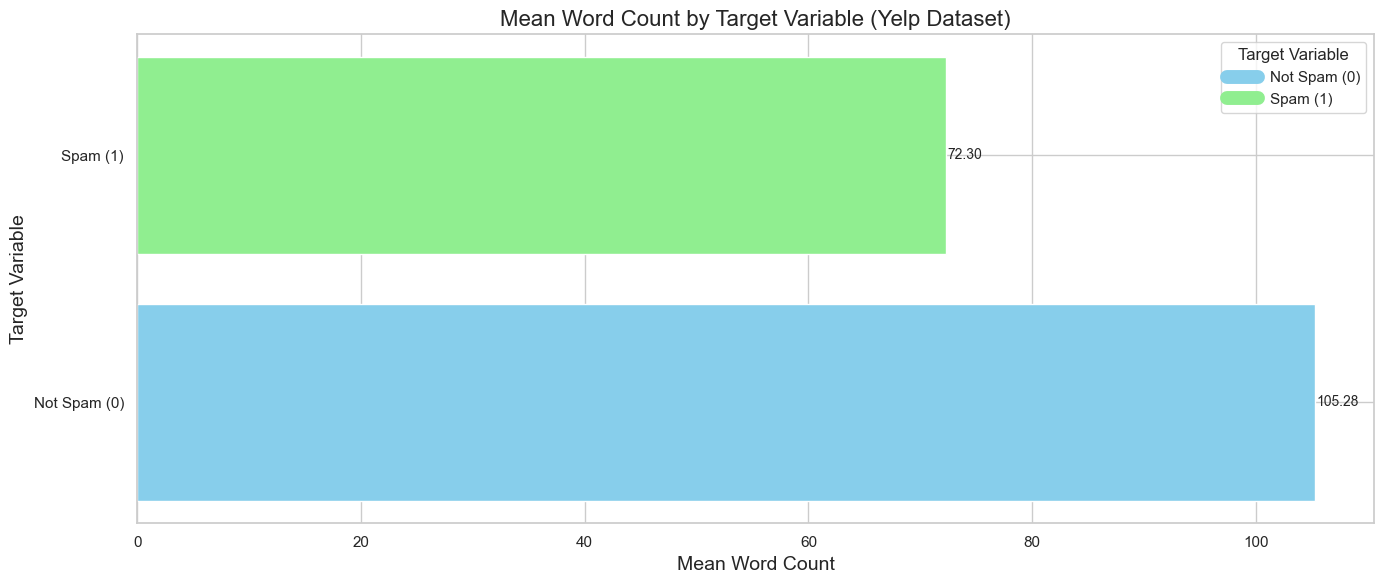

In [81]:
# Calculate mean word_count for yelp_cleaned_new_df_copy based on label
mean_word_count_by_label = yelp_cleaned_new_df_copy.groupby('Spam(1) and Not Spam(0)')['word_count'].mean().reset_index()

# Color mapping for target values
color_map = {0: 'skyblue', 1: 'lightgreen'}

# Set up the figure for the horizontal bar chart
fig, ax = plt.subplots(figsize=(14, 6))

# Plot the mean word count for yelp_cleaned_new_df_copy dataset (horizontal)
bars = ax.barh(mean_word_count_by_label['Spam(1) and Not Spam(0)'], mean_word_count_by_label['word_count'], color=[color_map[label] for label in mean_word_count_by_label['Spam(1) and Not Spam(0)']])

ax.set_title('Mean Word Count by Target Variable (Yelp Dataset)', fontsize=16)
ax.set_xlabel('Mean Word Count', fontsize=14)
ax.set_ylabel('Target Variable', fontsize=14)
ax.set_yticks([0, 1])
ax.set_yticklabels(['Not Spam (0)', 'Spam (1)'])

# Adding the mean values at the end of each bar
for i, value in enumerate(mean_word_count_by_label['word_count']):
    ax.text(value + 0.1, i, f'{value:.2f}', va='center', fontsize=10)

# Custom legend for target classification
legend_labels = [0, 1]  # Use integers to match the color_map keys
handles = [plt.Line2D([0], [0], color=color_map[label], lw=10) for label in legend_labels]
ax.legend(handles, ['Not Spam (0)', 'Spam (1)'], title="Target Variable", loc='upper right')

# Adjust layout
plt.tight_layout()
plt.show()


# Word cloud

## Fake Reviews dataset

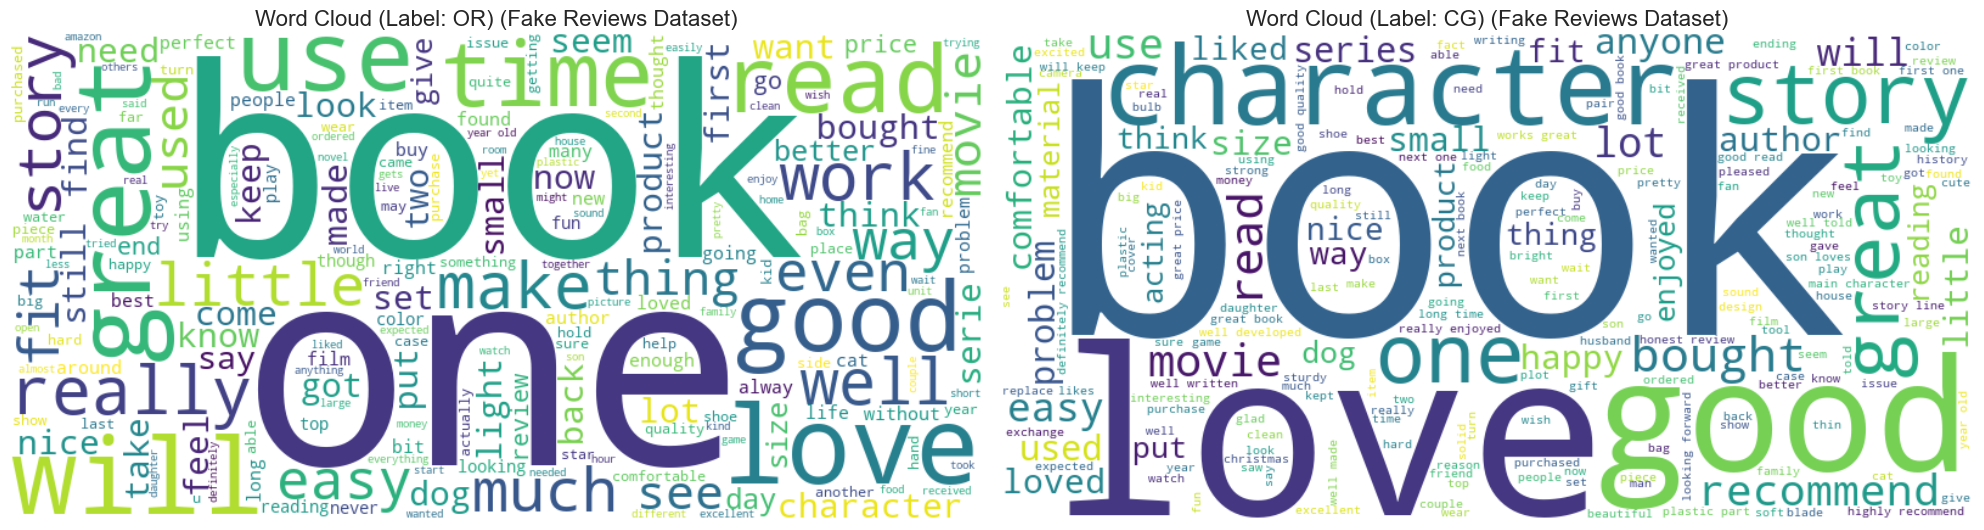

In [82]:
# Combine all descriptions into a single string for label 'OR'
or_text = ' '.join(fake_reviews_cleaned_new_df_copy[fake_reviews_cleaned_new_df_copy['label'] == 'OR']['cleaned_text'].dropna().tolist())

# Generate the word cloud for label 'OR'
wordcloud_or = WordCloud(width=800, height=400, background_color='white').generate(or_text)

# Combine all descriptions into a single string for label 'CG'
cg_text = ' '.join(fake_reviews_cleaned_new_df_copy[fake_reviews_cleaned_new_df_copy['label'] == 'CG']['cleaned_text'].dropna().tolist())

# Generate the word cloud for label 'CG'
wordcloud_cg = WordCloud(width=800, height=400, background_color='white').generate(cg_text)

# Set up the figure for displaying the word clouds
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# Display the word cloud for label 'OR'
axes[0].imshow(wordcloud_or, interpolation='bilinear')
axes[0].set_title('Word Cloud (Label: OR) (Fake Reviews Dataset)', fontsize=16)
axes[0].axis('off')  # Hide the axes

# Display the word cloud for label 'CG'
axes[1].imshow(wordcloud_cg, interpolation='bilinear')
axes[1].set_title('Word Cloud (Label: CG) (Fake Reviews Dataset)', fontsize=16)
axes[1].axis('off')  # Hide the axes

# Adjust layout and show the word clouds
plt.tight_layout()
plt.show()

## Yelp dataset

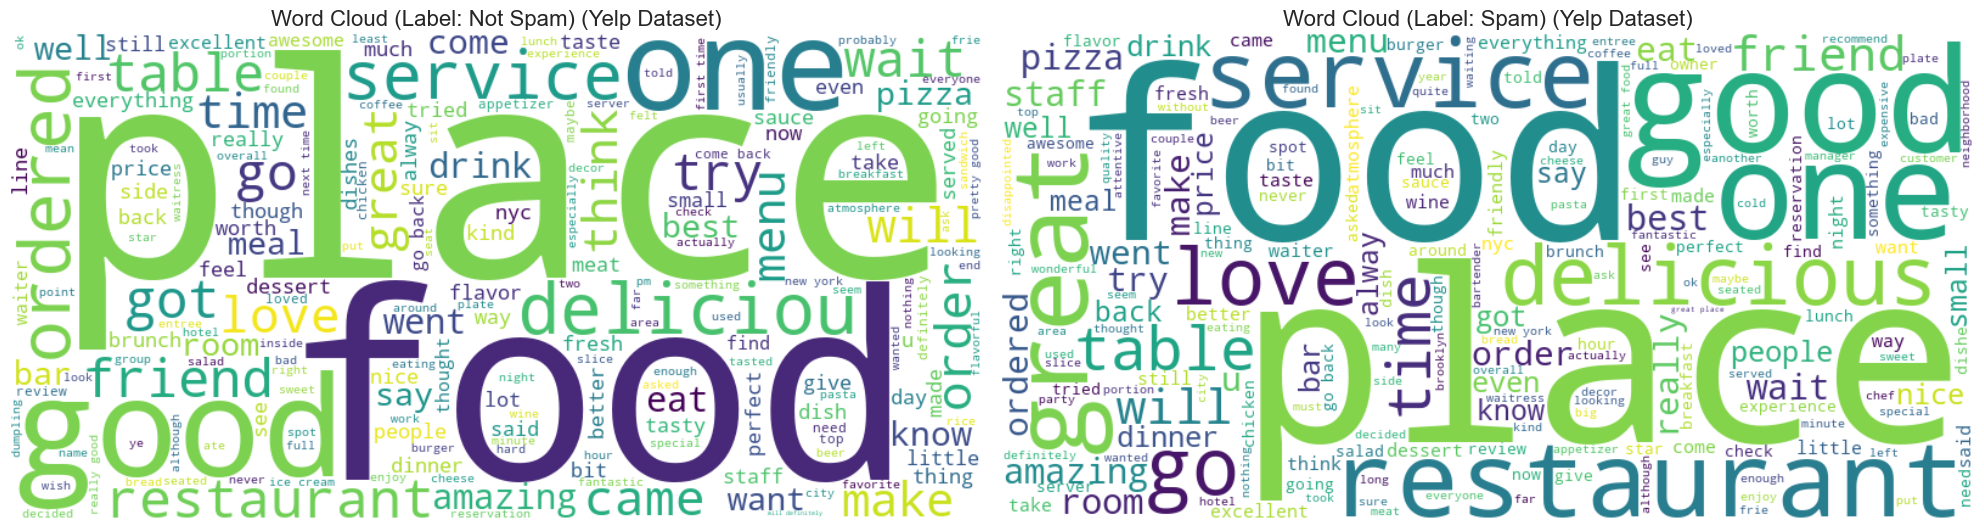

In [83]:
# Combine all descriptions into a single string for label 0 (Not Spam)
not_spam_text = ' '.join(yelp_cleaned_new_df_copy[yelp_cleaned_new_df_copy['Spam(1) and Not Spam(0)'] == 0]['cleaned_review'].dropna().tolist())

# Generate the word cloud for label 0 (Not Spam)
wordcloud_not_spam = WordCloud(width=800, height=400, background_color='white').generate(not_spam_text)

# Combine all descriptions into a single string for label 1 (Spam)
spam_text = ' '.join(yelp_cleaned_new_df_copy[yelp_cleaned_new_df_copy['Spam(1) and Not Spam(0)'] == 1]['cleaned_review'].dropna().tolist())

# Generate the word cloud for label 1 (Spam)
wordcloud_spam = WordCloud(width=800, height=400, background_color='white').generate(spam_text)

# Set up the figure for displaying the word clouds
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# Display the word cloud for label 0 (Not Spam)
axes[0].imshow(wordcloud_not_spam, interpolation='bilinear')
axes[0].set_title('Word Cloud (Label: Not Spam) (Yelp Dataset)', fontsize=16)
axes[0].axis('off')  # Hide the axes

# Display the word cloud for label 1 (Spam)
axes[1].imshow(wordcloud_spam, interpolation='bilinear')
axes[1].set_title('Word Cloud (Label: Spam) (Yelp Dataset)', fontsize=16)
axes[1].axis('off')  # Hide the axes

# Adjust layout and show the word clouds
plt.tight_layout()
plt.show()


# Heatmap between numerical features

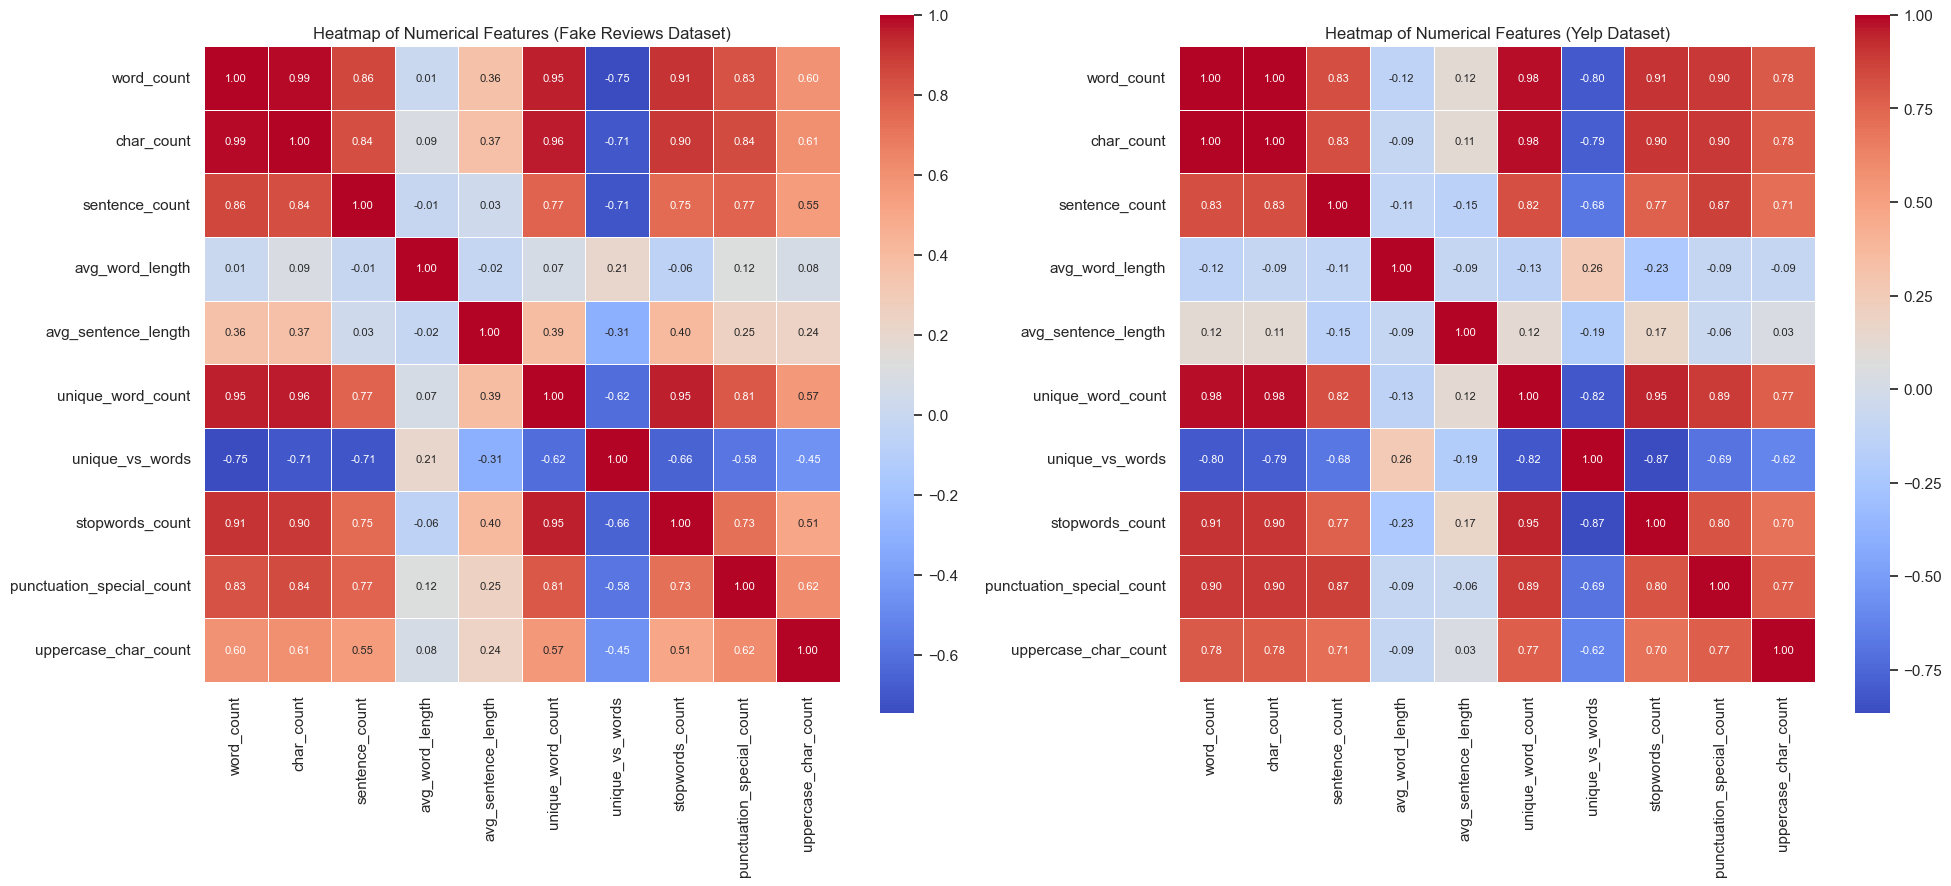

In [84]:
# Define the original numerical features
numerical_features = [
    'word_count', 'char_count', 'sentence_count', 'avg_word_length',
    'avg_sentence_length', 'unique_word_count', 'unique_vs_words',
    'stopwords_count', 'punctuation_special_count', 'uppercase_char_count'
]

# Function to plot heatmap
def plot_heatmap(df, features, title, ax):
    corr = df[features].corr()
    sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True,
                cbar_kws={"shrink": .8}, linewidths=.5, ax=ax, annot_kws={"size": 8})
    ax.set_title(title, fontsize=12)

# Set up the matplotlib figure with 1 row and 2 columns for side by side
fig, axes = plt.subplots(1, 2, figsize=(20, 10))  # Increase the figure size

# Calculate and plot the initial correlation matrix for fake_reviews_cleaned_new_df_copy
plot_heatmap(fake_reviews_cleaned_new_df_copy, numerical_features, 'Heatmap of Numerical Features (Fake Reviews Dataset)', axes[0])

# Calculate and plot the initial correlation matrix for yelp_cleaned_new_df_copy
plot_heatmap(yelp_cleaned_new_df_copy, numerical_features, 'Heatmap of Numerical Features (Yelp Dataset)', axes[1])

# Adjust layout
plt.tight_layout()
plt.show()

In [85]:
# Set a threshold for correlation
threshold = 0.8

# Find pairs of highly correlated features in fake_reviews_cleaned_new_df_copy
corr_matrix_fake = fake_reviews_cleaned_new_df_copy[numerical_features].corr().abs()
upper_tri_fake = corr_matrix_fake.where(np.triu(np.ones(corr_matrix_fake.shape), k=1).astype(bool))

# Identify features to drop in fake_reviews_cleaned_new_df_copy
to_drop_fake = [column for column in upper_tri_fake.columns if any(upper_tri_fake[column] > threshold)]

print(f"Features to drop due to high correlation in fake_reviews_cleaned_new_df_copy (threshold = {threshold}):")
print(to_drop_fake)

Features to drop due to high correlation in fake_reviews_cleaned_new_df_copy (threshold = 0.8):
['char_count', 'sentence_count', 'unique_word_count', 'stopwords_count', 'punctuation_special_count']


In [86]:
# Find pairs of highly correlated features in yelp_cleaned_new_df_copy
corr_matrix_yelp = yelp_cleaned_new_df_copy[numerical_features].corr().abs()
upper_tri_yelp = corr_matrix_yelp.where(np.triu(np.ones(corr_matrix_yelp.shape), k=1).astype(bool))

# Identify features to drop in yelp_cleaned_new_df_copy
to_drop_yelp = [column for column in upper_tri_yelp.columns if any(upper_tri_yelp[column] > threshold)]

print(f"Features to drop due to high correlation in yelp_cleaned_new_df_copy (threshold = {threshold}):")
print(to_drop_yelp)

Features to drop due to high correlation in yelp_cleaned_new_df_copy (threshold = 0.8):
['char_count', 'sentence_count', 'unique_word_count', 'unique_vs_words', 'stopwords_count', 'punctuation_special_count']


In [87]:
# Combine features to drop from both DataFrames
to_drop_combined = list(set(to_drop_fake) | set(to_drop_yelp))

print(f"Combined features to drop due to high correlation (threshold = {threshold}):")
print(to_drop_combined)

Combined features to drop due to high correlation (threshold = 0.8):
['stopwords_count', 'sentence_count', 'punctuation_special_count', 'unique_vs_words', 'unique_word_count', 'char_count']


In [88]:
# Drop highly correlated features from numerical_features
numerical_features_reduced = [feature for feature in numerical_features if feature not in to_drop_combined]

# Drop features from fake_reviews_cleaned_new_df_copy
fake_reviews_cleaned_new_df_copy_reduced = fake_reviews_cleaned_new_df_copy.drop(columns=to_drop_combined)

# Drop features from yelp_cleaned_new_df_copy
yelp_cleaned_new_df_copy_reduced = yelp_cleaned_new_df_copy.drop(columns=to_drop_combined)

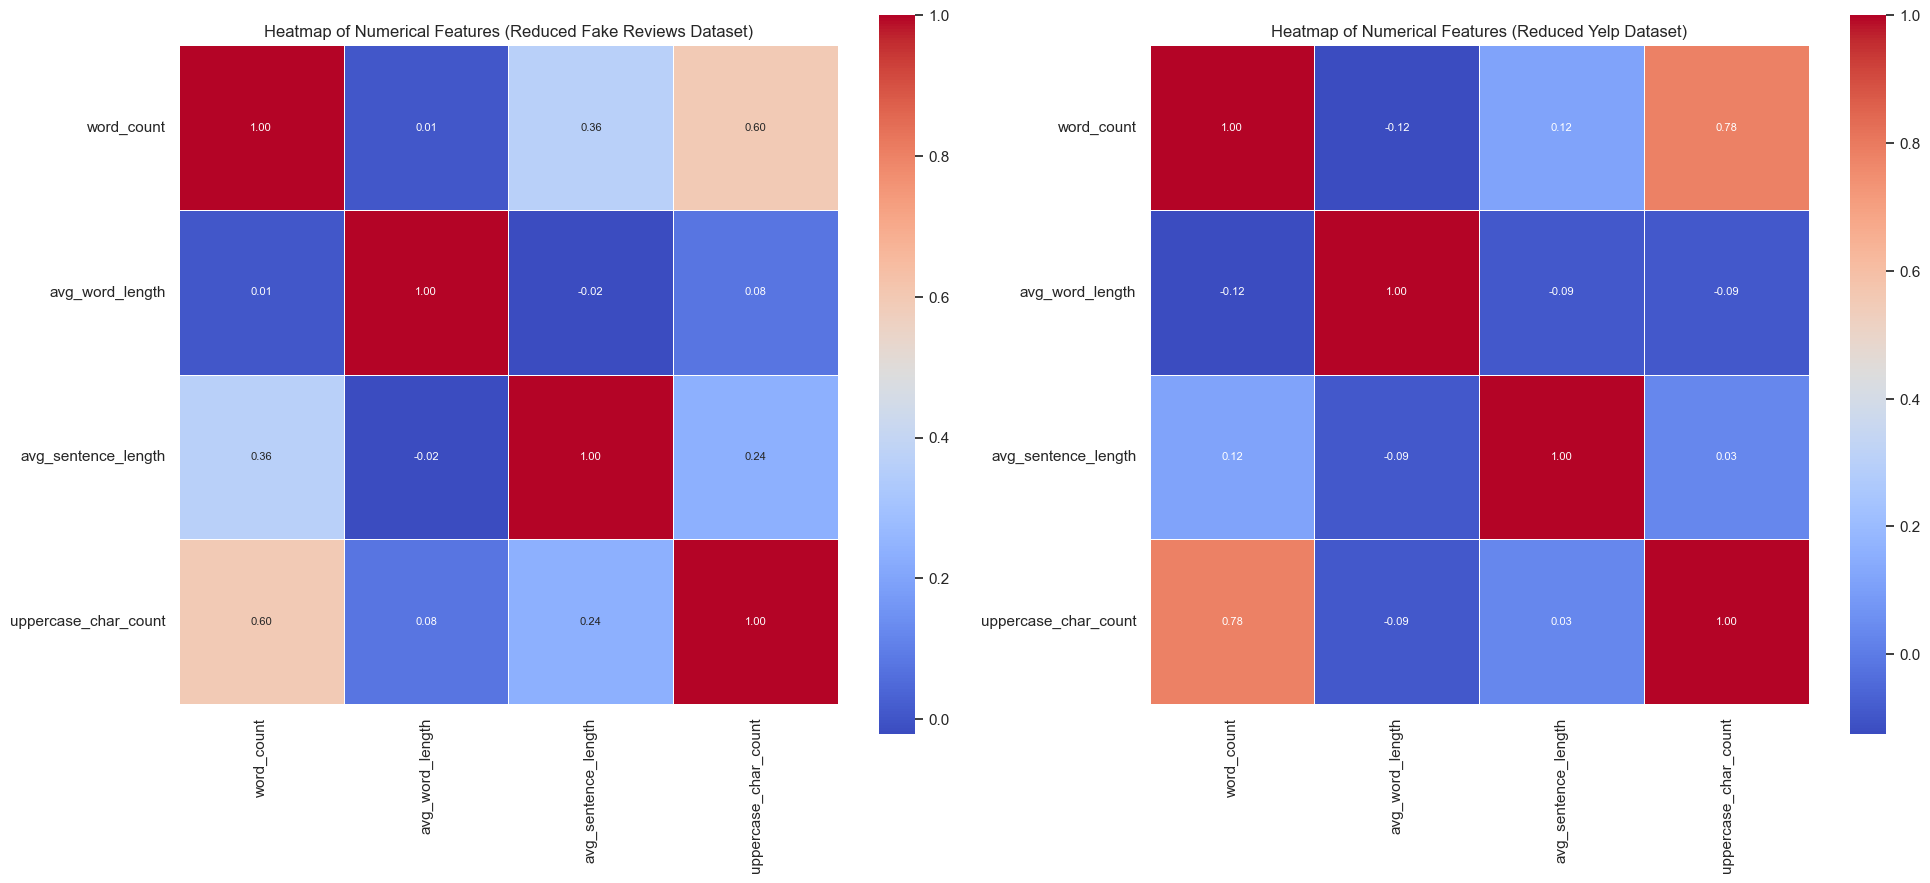

In [89]:
# Set up the matplotlib figure with 1 row and 2 columns for side by side
fig, axes = plt.subplots(1, 2, figsize=(20, 10))  # Increase the figure size

# Calculate and plot the correlation matrix for the reduced fake_reviews_cleaned_new_df_copy
plot_heatmap(fake_reviews_cleaned_new_df_copy_reduced, numerical_features_reduced, 'Heatmap of Numerical Features (Reduced Fake Reviews Dataset)', axes[0])

# Calculate and plot the correlation matrix for the reduced yelp_cleaned_new_df_copy
plot_heatmap(yelp_cleaned_new_df_copy_reduced, numerical_features_reduced, 'Heatmap of Numerical Features (Reduced Yelp Dataset)', axes[1])

# Adjust layout
plt.tight_layout()
plt.show()

# Vader sentiment distribution for Fake Reviews Dataset

## Assigning sentiments to reviews

In [90]:
def analyze_sentiment_vader(text):
    sia = SentimentIntensityAnalyzer()
    scores = sia.polarity_scores(str(text))
    compound = scores['compound']
    
    if compound > 0.05:
        return 'Positive'
    elif compound < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

In [91]:
# Apply sentiment analysis method
fake_reviews_cleaned_new_df_copy_reduced['Sentiment'] = fake_reviews_cleaned_new_df_copy_reduced['text_'].apply(analyze_sentiment_vader)

## Analyze distribution of sentiments

In [92]:
# Analyze distribution of sentiments
def vader_sentiment_distribution(sentiment_column):
    distribution = fake_reviews_cleaned_new_df_copy_reduced[sentiment_column].value_counts()
    percentages = fake_reviews_cleaned_new_df_copy_reduced[sentiment_column].value_counts(normalize=True) * 100
    
    print(f"\nDistribution for {sentiment_column}:")
    for category in ['Positive', 'Neutral', 'Negative']:
        count = distribution.get(category, 0)
        percentage = percentages.get(category, 0)
        print(f"{category}: {count} reviews ({percentage:.2f}%)")

In [93]:
vader_sentiment_distribution('Sentiment')


Distribution for Sentiment:
Positive: 34190 reviews (84.59%)
Neutral: 1888 reviews (4.67%)
Negative: 4341 reviews (10.74%)


In [94]:
# Compare with ratings
def analyze_sentiment_vs_ratings():
    sentiment_rating_comparison = pd.crosstab(fake_reviews_cleaned_new_df_copy_reduced['Sentiment'], 
                                            fake_reviews_cleaned_new_df_copy_reduced['rating'], 
                                            normalize='columns') * 100
    print("\nPercentage of sentiments for each rating:")
    print(sentiment_rating_comparison)

In [95]:
analyze_sentiment_vs_ratings()


Percentage of sentiments for each rating:
rating           1.0        2.0        3.0        4.0        5.0
Sentiment                                                       
Negative   38.375870  28.164718  17.828843   9.065796   6.367377
Neutral     8.445476   7.727504   5.731643   3.992968   4.151220
Positive   53.178654  64.107778  76.439514  86.941236  89.481403


In [96]:
# Sample reviews with their sentiments
def show_sample_reviews():
    print("\nSample Reviews with VADER Sentiments:")
    samples = fake_reviews_cleaned_new_df_copy_reduced.sample(5)
    for _, row in samples.iterrows():
        print("\n" + "="*80)
        print(f"Text: {row['text_'][:200]}...")
        print(f"Rating: {row['rating']}")
        print(f"VADER Sentiment: {row['Sentiment']}")

In [97]:
show_sample_reviews()


Sample Reviews with VADER Sentiments:

Text: I was so excited when I opened the box and found this saw.  It's been one of my favorite saws for the past few years and I'm sure I'll be buying more of these blades in the future.  I think it's going...
Rating: 5.0
VADER Sentiment: Positive

Text: Makes keeping track of shoes easier, up off the floor and visible....
Rating: 4.0
VADER Sentiment: Positive

Text: Fit great, plenty of toe room for expansion as the day goes on. Really didn't have to think about them which is as it should be when riding a MTB....
Rating: 5.0
VADER Sentiment: Positive

Text: Out of the whole series, this one is definitely my favorite! I loved reading every minute of this story! I would love to read more of the story, I didn't want the book to end!...
Rating: 5.0
VADER Sentiment: Positive

Text: I loved this story! I have read all of the transformed series and Gessilyn is a great side character so it was awesome to read her story. As usual Stacy Claflin didn't dis

## Graphs between sentiment and target variable

Distribution of sentiment

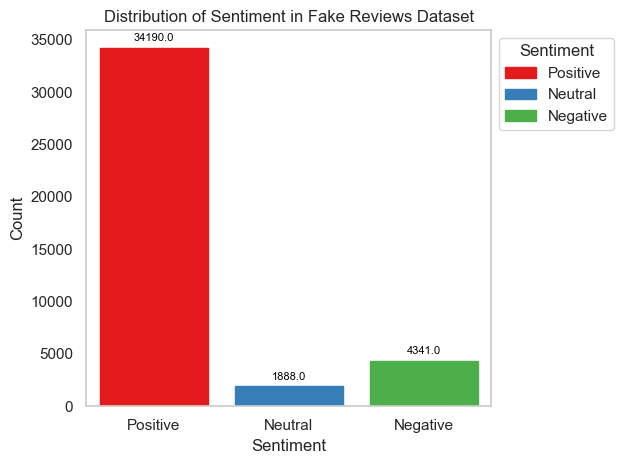

In [98]:
# Check the unique values in 'Sentiment'
unique_sentiments = fake_reviews_cleaned_new_df_copy_reduced['Sentiment'].unique()

# Create the countplot without 'palette'
ax_fake_reviews = sns.countplot(x='Sentiment', data=fake_reviews_cleaned_new_df_copy_reduced)

# Manually color each bar using the 'Set1' palette (3 unique colors)
colors_fake_reviews_sentiment = sns.color_palette("Set1", n_colors=3)
for i, bar in enumerate(ax_fake_reviews.patches):
    bar.set_color(colors_fake_reviews_sentiment[i % 3])  # Apply colors cyclically for each sentiment

# Add title and labels
plt.title("Distribution of Sentiment in Fake Reviews Dataset")
plt.xlabel("Sentiment")
plt.ylabel("Count")

# Annotate each bar with the count
for p in ax_fake_reviews.patches:
    height = p.get_height()
    if height > 0:
        ax_fake_reviews.annotate(f'{height}', 
                                 (p.get_x() + p.get_width() / 2., height), 
                                 ha='center', va='baseline',
                                 fontsize=8, color='black', xytext=(0, 5), 
                                 textcoords='offset points')

# Manually create the legend
handles = [mpatches.Patch(color=colors_fake_reviews_sentiment[i], label=unique_sentiments[i]) for i in range(len(unique_sentiments))]
plt.legend(handles=handles, title='Sentiment', loc='upper left', bbox_to_anchor=(1, 1))

# Display the plot
plt.grid(False)
plt.tight_layout()
plt.show()

Distribution of sentiment by target variable and Distribution of target variable by sentiment 

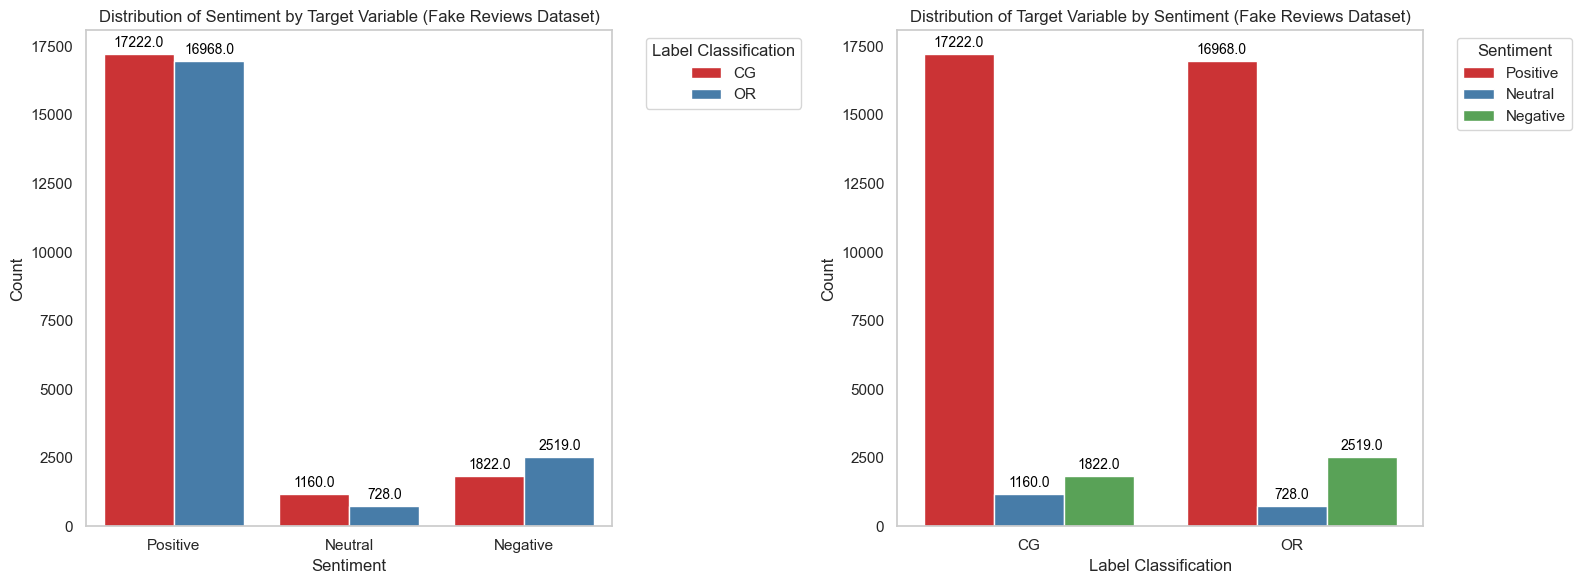

In [99]:
# Set up the figure and subplots for side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# First Plot: Distribution of Sentiment by Target Variable
sns.countplot(x='Sentiment', hue='label', data=fake_reviews_cleaned_new_df_copy_reduced, palette='Set1', ax=axes[0])

# Add title and labels for the first plot
axes[0].set_title("Distribution of Sentiment by Target Variable (Fake Reviews Dataset)")
axes[0].set_xlabel("Sentiment")
axes[0].set_ylabel("Count")

# Turn off the grid
axes[0].grid(False)

# Add annotations for the first plot, only if height > 0
for p in axes[0].patches:
    height = p.get_height()
    if height > 0:  # Only annotate if height is greater than zero
        axes[0].annotate(f'{height}', 
                         (p.get_x() + p.get_width() / 2., height), 
                         ha='center', va='baseline', fontsize=10, 
                         color='black', xytext=(0, 5), 
                         textcoords='offset points')

# Rotate x-axis labels for better readability if needed
axes[0].tick_params(axis='x', rotation=0)

# Create a legend outside the first plot
axes[0].legend(title='Label Classification', bbox_to_anchor=(1.05, 1), loc='upper left')

# Second Plot: Distribution of Label by Sentiment
sns.countplot(x='label', hue='Sentiment', data=fake_reviews_cleaned_new_df_copy_reduced, palette='Set1', ax=axes[1])

# Add title and labels for the second plot
axes[1].set_title("Distribution of Target Variable by Sentiment (Fake Reviews Dataset)")
axes[1].set_xlabel("Label Classification")
axes[1].set_ylabel("Count")

# Turn off the grid
axes[1].grid(False)

# Add annotations for the second plot, only if height > 0
for p in axes[1].patches:
    height = p.get_height()
    if height > 0:  # Only annotate if height is greater than zero
        axes[1].annotate(f'{height}', 
                         (p.get_x() + p.get_width() / 2., height), 
                         ha='center', va='baseline', fontsize=10, 
                         color='black', xytext=(0, 5), 
                         textcoords='offset points')

# Rotate x-axis labels for better readability if needed
axes[1].tick_params(axis='x', rotation=0)

# Create a legend outside the second plot
axes[1].legend(title='Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout for both plots
plt.tight_layout()
plt.show()


## Compound score of sentiments

Range: The compound score ranges from -1 to 1. A score close to -1 indicates a very negative sentiment. A score close to 1 indicates a very positive sentiment. Scores around 0 indicate a neutral sentiment.

Granularity: The compound score provides a more granular measure of sentiment compared to categorical labels like Positive, Negative, or Neutral.
It allows for more detailed analysis of sentiment intensity.

In [100]:
# Create a sentiment score column (for more granular analysis)
def get_sentiment_score(text):
    sia = SentimentIntensityAnalyzer()
    return sia.polarity_scores(str(text))['compound']

In [101]:
fake_reviews_cleaned_new_df_copy_reduced['sentiment_score'] = fake_reviews_cleaned_new_df_copy_reduced['text_'].apply(get_sentiment_score)

In [102]:
# Compare sentiment scores with ratings
def plot_sentiment_vs_ratings():
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=fake_reviews_cleaned_new_df_copy_reduced, x='rating', y='sentiment_score')
    plt.title('Distribution of Sentiment Score by Rating (Fake Reviews Dataset)')
    plt.xlabel("Rating")
    plt.ylabel("Sentiment Score")
    plt.grid(False)
    plt.show()

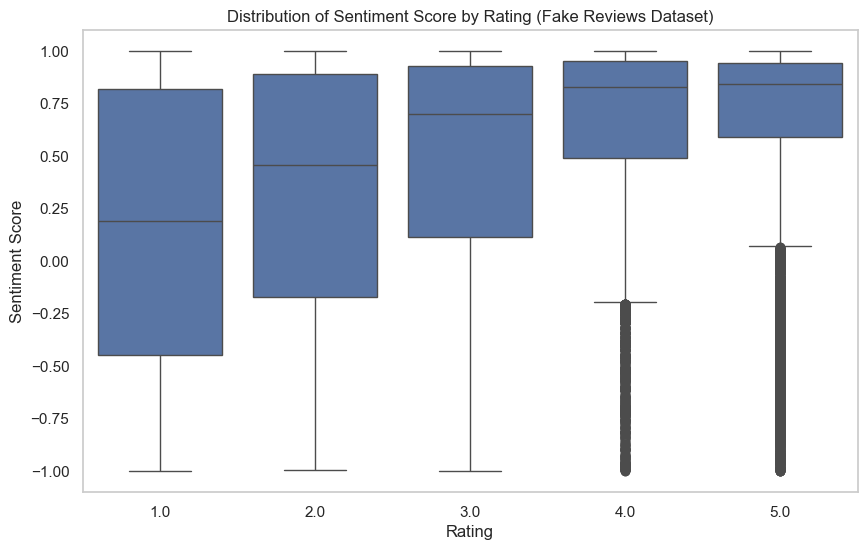

In [103]:
plot_sentiment_vs_ratings()

## Confidence level of sentiments

In [104]:
# Add confidence levels to sentiments
def get_sentiment_with_confidence(text):
    sia = SentimentIntensityAnalyzer()
    scores = sia.polarity_scores(str(text))
    compound = scores['compound']
    
    if compound > 0.05:
        confidence = min(abs(compound - 0.05) / 0.95, 1.0)
        return confidence
    elif compound < -0.05:
        confidence = min(abs(compound + 0.05) / 0.95, 1.0)
        return confidence
    else:
        confidence = 1 - (abs(compound) / 0.05)
        return confidence

In [105]:
# Apply sentiment analysis with confidence
fake_reviews_cleaned_new_df_copy_reduced[['confidence_level']] = pd.DataFrame(
    fake_reviews_cleaned_new_df_copy_reduced['text_'].apply(get_sentiment_with_confidence).tolist(),
    index=fake_reviews_cleaned_new_df_copy_reduced.index
)

In [106]:
# Show high-confidence examples for each category
def show_high_confidence_examples():
    print("\nHigh Confidence Examples for Each Sentiment:")
    for sentiment in ['Positive', 'Negative', 'Neutral']:
        print(f"\n{sentiment.upper()} Reviews (High Confidence):")
        samples = fake_reviews_cleaned_new_df_copy_reduced[fake_reviews_cleaned_new_df_copy_reduced['Sentiment'] == sentiment].nlargest(2, 'confidence_level')
        for _, row in samples.iterrows():
            print(f"\nText: {row['text_'][:200]}...")
            print(f"Confidence: {row['confidence_level']:.2f}")
        print("\n" + "="*80)

In [107]:
show_high_confidence_examples()


High Confidence Examples for Each Sentiment:

POSITIVE Reviews (High Confidence):

Text: I was blown away by this movie, and the acting was superb. There were a few moments in the movie that I missed. The script and directing were top notch. The acting was flawless. The acting was excelle...
Confidence: 1.00

Text: Ok, I have to admit that I didn't finish this book. I just didn't want to finish it. The book is a bit long, but it was great. The story was well told and the characters were strong. I would recommend...
Confidence: 1.00


NEGATIVE Reviews (High Confidence):

Text: Theodore Boone: The Accused by John Grisham, The Art of Murder, The Murder of the Innocent, The Murder of the Guilty, The Murder of the Innocent, The Murder of the Guilty, The Murder of the Guilty, Th...
Confidence: 1.00

Text: Matheson said, ". when I saw the movie, I just wasn't sure how to read it. "

The movie had a lot of "playful" dialogue, but it was not that funny. It was a good movie, but it was not very

# Adding food category for Yelp Dataset

In [108]:
# Add a new column called 'category' and fill it with the value 'Food_5'
yelp_cleaned_new_df_copy_reduced['category'] = 'Food_5'

# Encoding categorical variable

In [109]:
categorical_columns = [
    'Sentiment',
    'rating',
    'category',
]

Standardize the column names (Yelp Dataset)

In [110]:
yelp_cleaned_new_df_copy_renamed = yelp_cleaned_new_df_copy_reduced.rename(columns={'Spam(1) and Not Spam(0)': 'label'})

yelp_cleaned_new_df_copy_renamed = yelp_cleaned_new_df_copy_renamed.rename(columns={'Rating': 'rating'})

Encoding the label column to 0 and 1 (Fake Reviews Dataset)

In [111]:
# Set the pandas option for future behavior
pd.set_option('future.no_silent_downcasting', True)

# Perform the replacement
fake_reviews_cleaned_new_df_copy_reduced['label'] = fake_reviews_cleaned_new_df_copy_reduced['label'].replace({'OR': 0, 'CG': 1})

Standardize the rating column to float (Yelp Dataset)

In [112]:
yelp_cleaned_new_df_copy_renamed['rating'] = yelp_cleaned_new_df_copy_renamed['rating'].astype(float)

yelp_cleaned_new_df_copy_renamed['rating'] = yelp_cleaned_new_df_copy_renamed['rating'].astype(float)


Encode categorical variables

In [113]:
# Define the columns to retain
columns_to_retain = [
    'final_cleaned_review',
    'word_count',
    'avg_word_length',
    'avg_sentence_length',
    'uppercase_char_count',
    'Sentiment',
    'rating',
    'category',
    'label'
]

In [114]:
# Encode categorical variables
categorical_columns = ['Sentiment', 'category']

encoder = OneHotEncoder(sparse_output=False, drop='first')

# Fit the encoder on the combined categorical data
encoder.fit(pd.concat([
    yelp_cleaned_new_df_copy_renamed[categorical_columns],
    fake_reviews_cleaned_new_df_copy_reduced[categorical_columns]
], axis=0))

OneHotEncoder(drop='first', sparse_output=False)

In [115]:
# Encode yelp DataFrame
yelp_encoded = pd.DataFrame(encoder.transform(yelp_cleaned_new_df_copy_renamed[categorical_columns]),
                            columns=encoder.get_feature_names_out(categorical_columns))

# Encode fake reviews DataFrame
fake_reviews_encoded = pd.DataFrame(encoder.transform(fake_reviews_cleaned_new_df_copy_reduced[categorical_columns]),
                                    columns=encoder.get_feature_names_out(categorical_columns))

# Combine the encoded columns with the rest of the DataFrame for yelp
yelp_final_df = pd.concat([yelp_cleaned_new_df_copy_renamed[columns_to_retain].drop(columns=categorical_columns).reset_index(drop=True),
                                              yelp_encoded.reset_index(drop=True)], axis=1)

# Combine the encoded columns with the rest of the DataFrame for fake reviews
fake_reviews_final_df = pd.concat([fake_reviews_cleaned_new_df_copy_reduced[columns_to_retain].drop(columns=categorical_columns).reset_index(drop=True),
                                                      fake_reviews_encoded.reset_index(drop=True)], axis=1)


# Splitting datasets into train and test set

In [116]:
# Split the yelp dataset into training and test sets
X_yelp = yelp_final_df.drop(columns=['label'])

y_yelp = yelp_final_df['label']

X_yelp_train, X_yelp_test, y_yelp_train, y_yelp_test = train_test_split(X_yelp, y_yelp, test_size=0.2, random_state=42)

In [117]:
# Split the fake reviews dataset into training and test sets
X_fake_reviews = fake_reviews_final_df.drop(columns=['label'])

y_fake_reviews = fake_reviews_final_df['label']

X_fake_reviews_train, X_fake_reviews_test, y_fake_reviews_train, y_fake_reviews_test = train_test_split(X_fake_reviews, y_fake_reviews, test_size=0.2, random_state=42)

# TF-IDF

In [205]:
# Define the vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000)

In [206]:
# Fit and transform the training data for yelp
X_yelp_train_tfidf = pd.DataFrame(tfidf_vectorizer.fit_transform(X_yelp_train['final_cleaned_review']).toarray(),
                                  columns=tfidf_vectorizer.get_feature_names_out())

# Transform the test data for yelp
X_yelp_test_tfidf = pd.DataFrame(tfidf_vectorizer.transform(X_yelp_test['final_cleaned_review']).toarray(),
                                 columns=tfidf_vectorizer.get_feature_names_out())

In [207]:
# Fit and transform the training data for fake reviews
X_fake_reviews_train_tfidf = pd.DataFrame(tfidf_vectorizer.fit_transform(X_fake_reviews_train['final_cleaned_review']).toarray(),
                                          columns=tfidf_vectorizer.get_feature_names_out())

# Transform the test data for fake reviews
X_fake_reviews_test_tfidf = pd.DataFrame(tfidf_vectorizer.transform(X_fake_reviews_test['final_cleaned_review']).toarray(),
                                         columns=tfidf_vectorizer.get_feature_names_out())


In [208]:
# Combine the TF-IDF columns with the rest of the DataFrame for yelp training and test sets
X_yelp_train_encoded_tfidf = pd.concat([X_yelp_train.drop(columns=['final_cleaned_review']).reset_index(drop=True),
                                        X_yelp_train_tfidf.reset_index(drop=True)], axis=1)

X_yelp_test_encoded_tfidf = pd.concat([X_yelp_test.drop(columns=['final_cleaned_review']).reset_index(drop=True),
                                       X_yelp_test_tfidf.reset_index(drop=True)], axis=1)

In [209]:
# Combine the TF-IDF columns with the rest of the DataFrame for fake reviews training and test sets
X_fake_reviews_train_encoded_tfidf = pd.concat([X_fake_reviews_train.drop(columns=['final_cleaned_review']).reset_index(drop=True),
                                                X_fake_reviews_train_tfidf.reset_index(drop=True)], axis=1)

X_fake_reviews_test_encoded_tfidf = pd.concat([X_fake_reviews_test.drop(columns=['final_cleaned_review']).reset_index(drop=True),
                                               X_fake_reviews_test_tfidf.reset_index(drop=True)], axis=1)


# RandomUnderSampler

In [ ]:
# Apply RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy=0.15, random_state=42)

X_yelp_train_resampled, y_yelp_train_resampled = rus.fit_resample(X_yelp_train_encoded_tfidf, y_yelp_train)

In [ ]:
# Verify the resampling balance
print("Before SMOTE:", y_yelp_train.value_counts())
print("After SMOTE:", y_yelp_train_resampled.value_counts())

Before SMOTE: label
0    255298
1     28860
Name: count, dtype: int64
After SMOTE: label
0    240500
1     28860
Name: count, dtype: int64


In [212]:
# The test set remains unchanged
# Check dimensions for confirmation
print("X_yelp_train_resampled shape:", X_yelp_train_resampled.shape)
print("y_yelp_train_resampled shape:", y_yelp_train_resampled.shape)

print("X_yelp_test shape:", X_yelp_test_encoded_tfidf.shape)
print("y_yelp_test shape:", y_yelp_test.shape)

X_yelp_train_resampled shape: (269360, 1017)
y_yelp_train_resampled shape: (269360,)
X_yelp_test shape: (71040, 1017)
y_yelp_test shape: (71040,)


In [213]:
# The test set remains unchanged
# Check dimensions for confirmation
print("X_fake_reviews_train shape:", X_fake_reviews_train_encoded_tfidf.shape)
print("y_fake_reviews_train shape:", y_fake_reviews_train.shape)

print("X_fake_reviews_test shape:", X_fake_reviews_test_encoded_tfidf.shape)
print("y_fake_reviews_test shape:", y_fake_reviews_test.shape)

X_fake_reviews_train shape: (32335, 1017)
y_fake_reviews_train shape: (32335,)
X_fake_reviews_test shape: (8084, 1017)
y_fake_reviews_test shape: (8084,)


# Merging Fake Review Dataset and Yelp Dataset

In [214]:
# Find common columns between training datasets and testing datasets
common_columns_train = X_yelp_train_resampled.columns.intersection(X_fake_reviews_train_encoded_tfidf.columns)

common_columns_test = X_yelp_test_encoded_tfidf.columns.intersection(X_fake_reviews_test_encoded_tfidf.columns)

In [215]:
# Ensure only common columns are merged
X_yelp_train_resampled_common = X_yelp_train_resampled[common_columns_train]
X_fake_reviews_train_common = X_fake_reviews_train_encoded_tfidf[common_columns_train]

X_yelp_test_encoded_tfidf_common = X_yelp_test_encoded_tfidf[common_columns_test]
X_fake_reviews_test_encoded_tfidf_common = X_fake_reviews_test_encoded_tfidf[common_columns_test]

In [216]:
# Merge the training datasets
X_train_merged = pd.concat([X_yelp_train_resampled_common, X_fake_reviews_train_common], axis=0)
y_train_merged = pd.concat([y_yelp_train_resampled, y_fake_reviews_train], axis=0)

In [217]:
# Merge the testing datasets
X_test_merged = pd.concat([X_yelp_test_encoded_tfidf_common, X_fake_reviews_test_encoded_tfidf_common], axis=0)
y_test_merged = pd.concat([y_yelp_test, y_fake_reviews_test], axis=0)

In [218]:
# Output the merged datasets to CSV
X_train_merged.to_csv('X_train_merged.csv', index=False)
y_train_merged.to_csv('y_train_merged.csv', index=False)
X_test_merged.to_csv('X_test_merged.csv', index=False)
y_test_merged.to_csv('y_test_merged.csv', index=False)

print("Merging and output to CSV completed.")

Merging and output to CSV completed.
